# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-info"><b>Шаг 1: Загрузка и первичный анализ данных</b>

- Импортирую необходимые библиотеки: pandas и matplotlib.
- Загружу датасет из файла в DataFrame с использованием pandas.
- Первоначально изучу данные с использованием методов head(), info(), и describe() для получения предварительного представления о данных.
- Изучу типы данных и количество пропущенных значений в каждом столбце.

<b>Шаг 2: Предобработка данных</b>

- Выполню поиск пропусков с помощью isnull().sum() для определения количества пропусков в каждом столбце,
- Определю порядок и способы заполнения пропущенных значений,
- Выполню заполнение пропусков логичными значениями. Например, заменяю отсутствующие данные о количестве балконов на 0. С помощью метода fillna() заменю пропуски средними или медианными значениями там, где это имеет смысл. Если не удастся логично заменить пропуски, оставлю эти строки как есть для дальнейшего анализа.
- Преобразую типы данных с помощью метода dtypes в столбцах, которые нуждаются в изменении типов данных.
- Изучу уникальные значения в столбце с названиями населённых пунктов, используя метод unique().
- Исправляю неявные дубликаты, используя методы replace(), чтобы унифицировать названия населённых пунктов.

<b>Шаг 3: Добавление новых столбцов</b>

- Создам новый столбец со стоимостью 1 кв.м., поделив стоимость объекта на его общую площадь и округляю значение до двух знаков после запятой.
- Извлеку компоненты даты из столбца с датами публикации, используя методы dt.weekday, dt.month, и dt.year.
- Добавляю новый столбец, с типом категории этажа (первый, последний, другой) на основе этажности здания.
- Переведу расстояние до центра города из метров в километры и округляю до ближайшего целого числа.

<b>Шаг 4: Исследовательский анализ данных</b>

- Построю гистограммы для изучения распределения параметров общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка.
- Построю диаграммы рассеяния с выводом статистических данных для параметров общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка.
- Проализирую и обрабатаю аномалии в данных, исправляя выбросы когда это возможно или удаляя их.

- Проанализирую сроки продажи квартир построив гистограмму для анализа времени продажи квартир (days_exposition), рассчитываю среднее и медиану для оценки типичного времени продажи.

Анализ факторов, влияющих на стоимость:

- Исследую зависимость цены от таких параметров, как общая площадь, жилая площадь, количество комнат и этажность. Для этого посрою графики зависимости цены от каждого из параметров. В зависимости от комбинации буду строить гистрограммы, даиграммы размаха или даиграммы рассеяния.
-Проанализирую среднюю цену квадратного метра в разных населённых пунктах, выбрав для анализа топ 10. Для этого создам сводную таблицу для 10 населённых пунктов с наибольшим количеством объявлений, показывающую среднюю цену за квадратный метр, определю населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Проанализирую изменение медианной цены в зависимости от расстояния до центра по объявлениям с объектами в г.Санкт-Петербург. Для этого построю изменения средней цены в зависимости от расстояния до центра Санкт-Петербурга, используя ранее рассчитанные расстояния в километрах.

<b>Шаг 5: Общий вывод</b>

- Пропишу все ключевые выводы из проведённого анализа. 
- Сформулирую общий вывод исследования, указывая на важные наблюдения, выявленные в процессе работы с данными.</div>
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Получилось отлично👍

</div>


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Рекомендую добавить к работе небольшой план работы, написанный своими словами - навык составления ТЗ пригодится в будущем

</div>


## Открытие файла с данными и изучите общую информацию

In [1]:
# импорт matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки pandas
import pandas as pd
# чтение файла с данными и сохранение в data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# получение первых 20 строк таблицы data
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

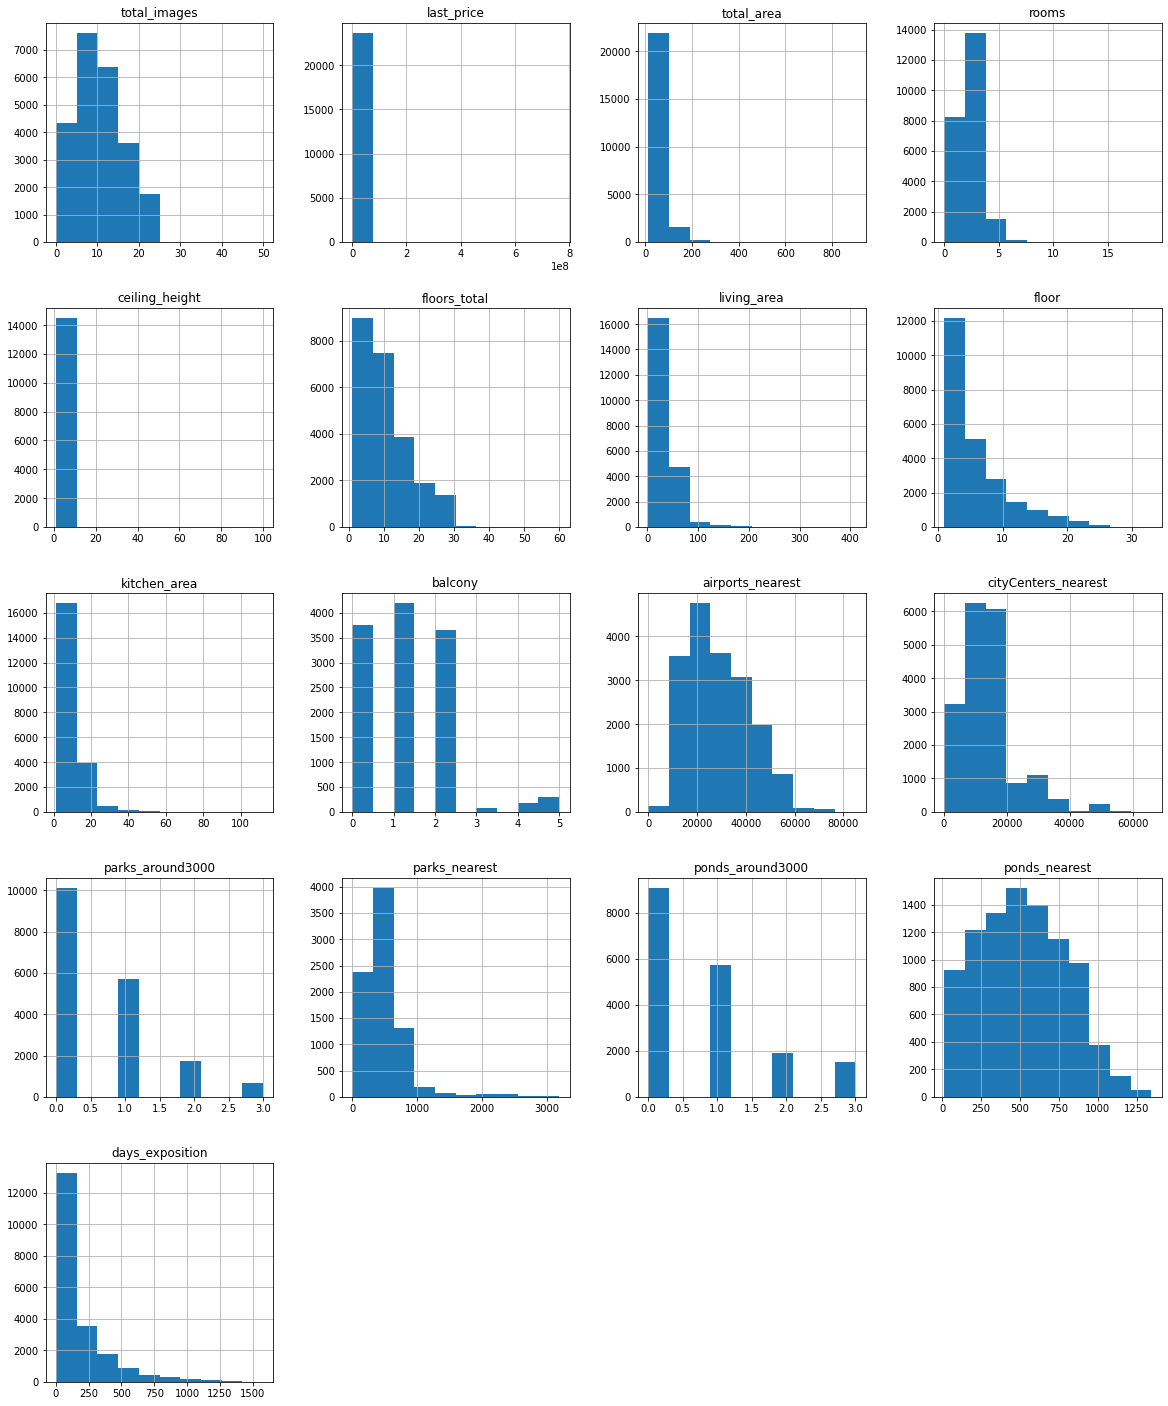

In [3]:
# поостроение матрицы гистограмм для всех числовых столбцов
data.hist(figsize=(20, 25))

По матрице гистограмм видны аномальные значения в некоторых распределениях, таких как высота потолков, которые могут быть либо ошибками в данных, либо редкими исключениями, а также наличие объектов с общей площадью более 200 квадратных метров и объектов со сроком продажи более 500 дней.

Необходимо проверить данные на наличие ошибок, пропусков и аномальных значений прежде чем приступать к анализу.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо. Гистограммы построены. Информация о данных получена. Приступим к предобработке

</div>


## Предобработка данных

<div class="alert alert-info">Перед обработкой пропусков и аномальных значений сохраним в переменную start_data_shape исходное количество данных.</div>

In [4]:
start_data_shape = data.shape
start_data_shape

(23699, 22)

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   👍

</div>


### Обработка пропущенных значений

In [5]:
# подсчёт пропусков
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце 'balcony' можно предположить, что пропущенные значения означают отсутствие балкона. Пропущенные значения заменим на ноль.

In [6]:
# замена пропущенных значений в столбце 'balcony' на ноль
data['balcony'] = data['balcony'].fillna(0.0)

In [7]:
# вывод уникальных значений столбца 'balcony'
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

В столбце 'is_apartment' необходимо заменить тип данных с object на bool. При замене типа данных пропущенные значения автоматически меняются False

In [8]:
#замена типа данных в столбце 'is_apartment' с object на bool
data['is_apartment'] = data['is_apartment'].astype(bool)

In [9]:
# проверка автоматической замены NaN на False
data['is_apartment'].isna().sum()

0

Чтобы заполнить пропуски в столбцах о жилой и кухонной площади, можно использовать средние значения или медианные значения этих столбцов. Однако в данных есть квартиры сильно отличающиеся по размерам общей площади и заполнение пропусков медианными или средними значениями столбца может привести к искажению данных. В данном случае будет логичнее высчитать медианное соотношение жилой и кухонной площади к общей площади квартиры и заполнить пропуски в данных рассчитав долю жилой и кухонной плащади от общей.
После заполнения пропусков округлим значения до двух знаков после запятой.

In [10]:
# вычисление средних процентов для жилой и кухонной площади от общей площади квартиры
mean_living_ratio = data['living_area'].mean() / data['total_area'].mean()
mean_kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

In [11]:
# заполнение пропусков на основе соотношений кухонной и жилой площади к общей площади квартиры
data['living_area'] = data['living_area'].fillna(data['total_area'] * mean_living_ratio)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * mean_kitchen_ratio)

# округление значений до 2 знаков после запятой
data['living_area'] = data['living_area'].round(2)
data['kitchen_area'] = data['kitchen_area'].round(2)

In [12]:
data['kitchen_area']

0        25.00
1        11.00
2         8.30
3        27.85
4        41.00
         ...  
23694    13.83
23695     8.50
23696     9.93
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

Пропуски в столбце 'ceiling_height' можно заполнить медианным значением.

In [13]:
# заполнение пропусков в столбце 'ceiling_height' на медианное значение
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Можно предположить что пропуски в столбцах 'parks_nearest' и 'ponds_nearest' означают отсутствие парков и водоемов поблизости. Однако стоит учесть что в данные по какой либо причине могли непопасть записи о расстоянии до ближайшего парка или водоема, но их количество может быть указано в столбцах 'parks_around3000' и 'ponds_around3000'. Заполним пропуски в столбцах 'parks_nearest' и 'ponds_nearest' на 0 при условии что в столбцах 'parks_around3000' и 'ponds_around3000' указано значение 0.

In [14]:
# заполнение пропусков в столбце 'parks_nearest' и 'ponds_nearest' на 0 при условии
# что в столбцах 'parks_around3000' и 'ponds_around3000' указано значение 0
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()), 'parks_nearest'] = 0
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = 0

In [15]:
# проверка на отсутствие пропусков в обработанных столбцах
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
days_exposition         3181
dtype: int64

В данных осталось практически одинаковое количество пропусков в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'. Можно предположить что для данных записей значение в этих столбцах равно нулю.

<div class="alert alert-info">Однако 100% уверенности в этом утверждении нет и так, как эти данные не участвуют в дальнейшем анализе лучше оставить эти пропуски как есть.</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Работая с картографическими данными (parks_around_3000, ponds_around_3000 и т.п. ) нужно быть очень осторожным - размах выборки большой, поэтому заполнение пропусков может привести к тому, что данные окажутся неактуальными - стоит оставить пропуски без изменений. К тому же, согласно ТЗ, в дальнейшем анализе они не участвуют

</div>


<div class="alert alert-info">Остались пропуски только в столбцах 'floors_total', 'locality_name', 'days_exposition'. С пропусками в 'days_exposition' разберемся чуть позже.
Для столбцов 'floors_total', 'locality_name' предположить логичную замену невозможно и их количество невелико, так что можем удалить эти строки без потери качества данных.</div>

In [16]:
# удаление строк с пропущенными значениями в столбцах 'floors_total', 'locality_name', 'days_exposition'
data = data.dropna(subset=['floors_total', 'locality_name'])

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   В столбцах floors_total и locality_name число пропусков крайне невелико - мы можем удалить их без потери качества данных. 

</div>


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   А вот в столбце days_exposition удаление пропусков может повлиять на качество данных, так как их достаточно много (3181) 

</div>


<div class="alert alert-info">В столбце days_exposition  довольно много пропусков - 3181 строка. Возможно это объявления, которые не были сняты с продажи и были актуальны на момент выгрузки данных. Проверим гипотезу с помощью сводной таблицы с количеством строк с пропущенными значениями в разбивке по годам.</div>

In [17]:
# код ревьюера
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,957,1788


<div class="alert alert-info">Судя по данным таблицы гипотеза подтвердилась. Больше всего пропусков в объявлениях за 2019 и 2018 года (наиболее поздние года в выборке). Так как эти объявления с большой долей вероятности все еще актуальны, пропуски в данном столбце оставим как есть.</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера v2❌**

Если рассматривать распределение пропусков относительно года выставления на продажу, можно заметить, что большая часть пропущенных значений - в 2019 году. Больше половины объектов, выставленных на продажу в 2019 году не имеет рассчитанного "времени продажи квартиры". Также высокая доля пропусков, хотя и меньшая - в 2018 году. Получается, чем свежей объявление - тем выше вероятность пропуска в этой колонке.

Пропуск в этой колонке означает, что объект не продан и объявление не закрыто. Поэтому заполнять пропуски в этом столбце не надо - они не случайные и существенно влияют на статистику.

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Исправлено👍

</div>


In [18]:
# проверка на отсутствие пропусков в обработанных столбцах
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000        5500
parks_nearest           5500
ponds_around3000        5500
ponds_nearest           5500
days_exposition         3171
first_day_year             0
dtype: int64

Пропуски в данных могут появляться по различным причинам:
1. Технические ошибки при сборе данных
2. Человеческий фактор (пропуски при заполнении анкет или ввод некорректных данных)
3. Несуществующие значения (например квартира продается в поселке или деревне и расстояние до центра города и\или аэропорта нет, т.к. их нет поблизости от дома\квартиры или населенного пункта)
4. Ошибки при выгрузке или передаче данных

Для выбора способов обработки пропусков и дальнейшего анализа данных важно понимание причин появления пропусков и их устранение.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
Теория обработки пропусков хорошо изложена в статье: https://loginom.ru/blog/missing. Особенно хорошо описаны виды пропусков и их влияние на целесообразность и выбор способа заполнения.
Действительно, решая аналитические задачи, заполнение пропусков может быть необязательно, если объем достоверных данных достаточен для выявления закономерностей, а риск изменить распределение данных существеннен. Не зря в задании просят: "Заполните пропущенные значения там, где это возможно". При ответе на вопросы исследования можно взять только достоверно известные значения, а пропуски проигнорировать, если надежного способа их заполнить нет. Я не считаю обязательным заполнять пропуски в данных аналитического проекта (не машинного обучения), если нет гарантии, что метод заполнения правильный.

</div>


### Обработка неявных дубликатов

В столбце с названиями населенных пунктов одни и те же типы населенных пунктов написаны по разному (например "городской поселок" и " поселок городского типа"), а также используются буквы е и ё. Необходимо приветси все названия к единому виду обработав неявные дубликаты.

In [19]:
# просмотр уникальных отсортированных названий населенных пунктов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [20]:
# устранение неявных дубликатов в столбце 'locality_name' 
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок'], 'поселок городского типа', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True)
    .replace(['поселок станции', 'поселок при железнодорожной станции'], 'поселок', regex=True)
) 

In [21]:
# проверка на отсутствие неявных дубликатов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [22]:
# проверка на наличие строк-дубликатов
data.duplicated().sum()

0

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**


   Хорошая работа. Также рекомендую хорошую статью по предобработке, в ней есть интересные способы обработки неявных дубликатов: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27 В пункте 8 есть интересная информация о работе с опечатками в названиях населенных пунктов

</div>


### Изменение типов данных

In [23]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

В столбцах 'floors_total', 'balcony'  указан тип данных float (вещественное число). Однако значения в этих столбцах могут быть только целочисленные. Заменим тип данных с float на int (целое число).

In [24]:
column_to_type = ['floors_total', 'balcony']
for column in column_to_type:
    data[column] = data[column].astype(int)

<div class="alert alert-info">В столбцах 'total_area', 'living_area', 'kitchen_area' изменим тип данных с float64 на float32 для оптимизации объемов занимаемой памяти. Округление значений при смене типа данных не критично для дальнейшего анализа.</div>

In [25]:
column_to_type = ['total_area', 'living_area', 'kitchen_area']
for column in column_to_type:
    data[column] = data[column].astype('float32')

<div class="alert alert-success">


**✔️ Комментарий ревьюера v2✔️**

   Если посмотреть на значения полей с площадями, можно заметить, что кроме нулей после запятой там ничего нет. Отличие типов float64 и float32 как раз в количестве знаков после запятой. Соответственно, если после запятой нет никаких полезных данных(в нашем случае неважно, сколько нулей - они информацию не несут) - мы можем заменить типы данных для экономии памяти. Подробнее - тут: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64

</div>


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float32       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float32       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float32       
 13  balcony         

Приведение типов данных в соответствие с данными, находящимися в ячейке, помогает избежать ошибок, оптимизировать использование ресурсов и улучшить читаемость кода.
Например, приведение типа данных с float на int важно для корректности выполнения операций, оптимизации использования памяти, избежания ошибок и неточностей при дальнейшей работе с данными.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**

   Можно еще сэкономить память, изменяя типы данных. Например, дополнительно изменить их у площадей квартир с float64 на float32.

</div>


### Добавьте в таблицу новые столбцы

Для дальнейшего анализа в таблицу необходимо добавить дополнительные столбцы с данными и категориями.

#### Добавление в даннык столбца с ценой 1 кв. м.

In [27]:
# добавление в таблицу столбца с ценой одного квадратного метра
data['cost_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

#### Добавление в даннык столбца с днем недели публикации объявления

In [28]:
# добавление в таблицу столбца с днем недели публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

#### Добавление в даннык столбца с месяцем публикации объявления

In [29]:
# добавление в таблицу столбца с месяцем публикации объявления
data['month'] = data['first_day_exposition'].dt.month

#### Добавление в даннык столбца с годом публикации объявления

In [30]:
# добавление в таблицу столбца с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

#### Добавление в даннык столбца с категорией этажа

In [31]:
# добавление в таблицу столбца с категорией этажа
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(categorize_floor, axis=1)

#### Добавление в даннык столбца с расстоянием от центра города в км

In [32]:
# добавление в таблицу столбца с расстоянием от центра города в км
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [33]:
# проверка добавленых столбцов в таблицу
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,cost_per_square_meter,day_of_week,month,year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,True,...,2.0,755.0,NaN,2019,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11,18.600000,1,True,...,0.0,0.0,81.0,2018,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,True,...,2.0,574.0,558.0,2015,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,90.790001,9,True,...,3.0,234.0,424.0,2015,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,True,...,1.0,48.0,121.0,2018,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,True,...,NaN,NaN,55.0,2018,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.299999,2017-11-02,1,2.65,26,10.600000,6,True,...,0.0,0.0,155.0,2017,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24,40.880001,22,True,...,0.0,0.0,NaN,2019,110544.70,3,4,2019,другой,12.0
8,20,2900000.0,33.160000,2018-05-23,1,2.65,27,15.430000,26,True,...,NaN,NaN,189.0,2018,87454.77,2,5,2018,другой,NaN
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9,43.599998,7,True,...,0.0,0.0,289.0,2017,88524.59,6,2,2017,другой,15.0


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно

</div>

### Проведите исследовательский анализ данных

Изучим наиболее важные параметры объектов, построив отдельные гистограммы для каждого из них. Для изучения выберем следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

Создадим список названий столбцов и выведем гистограммы для всего списка.

In [34]:
# создание списка столбцов
fields_list = ['total_area', 'living_area', 'kitchen_area', 'last_price'
                , 'rooms', 'ceiling_height', 'floor', 'floor_category', 'floors_total'
                , 'cityCenters_nearest', 'airports_nearest', 'parks_nearest'
                , 'day_of_week', 'month']

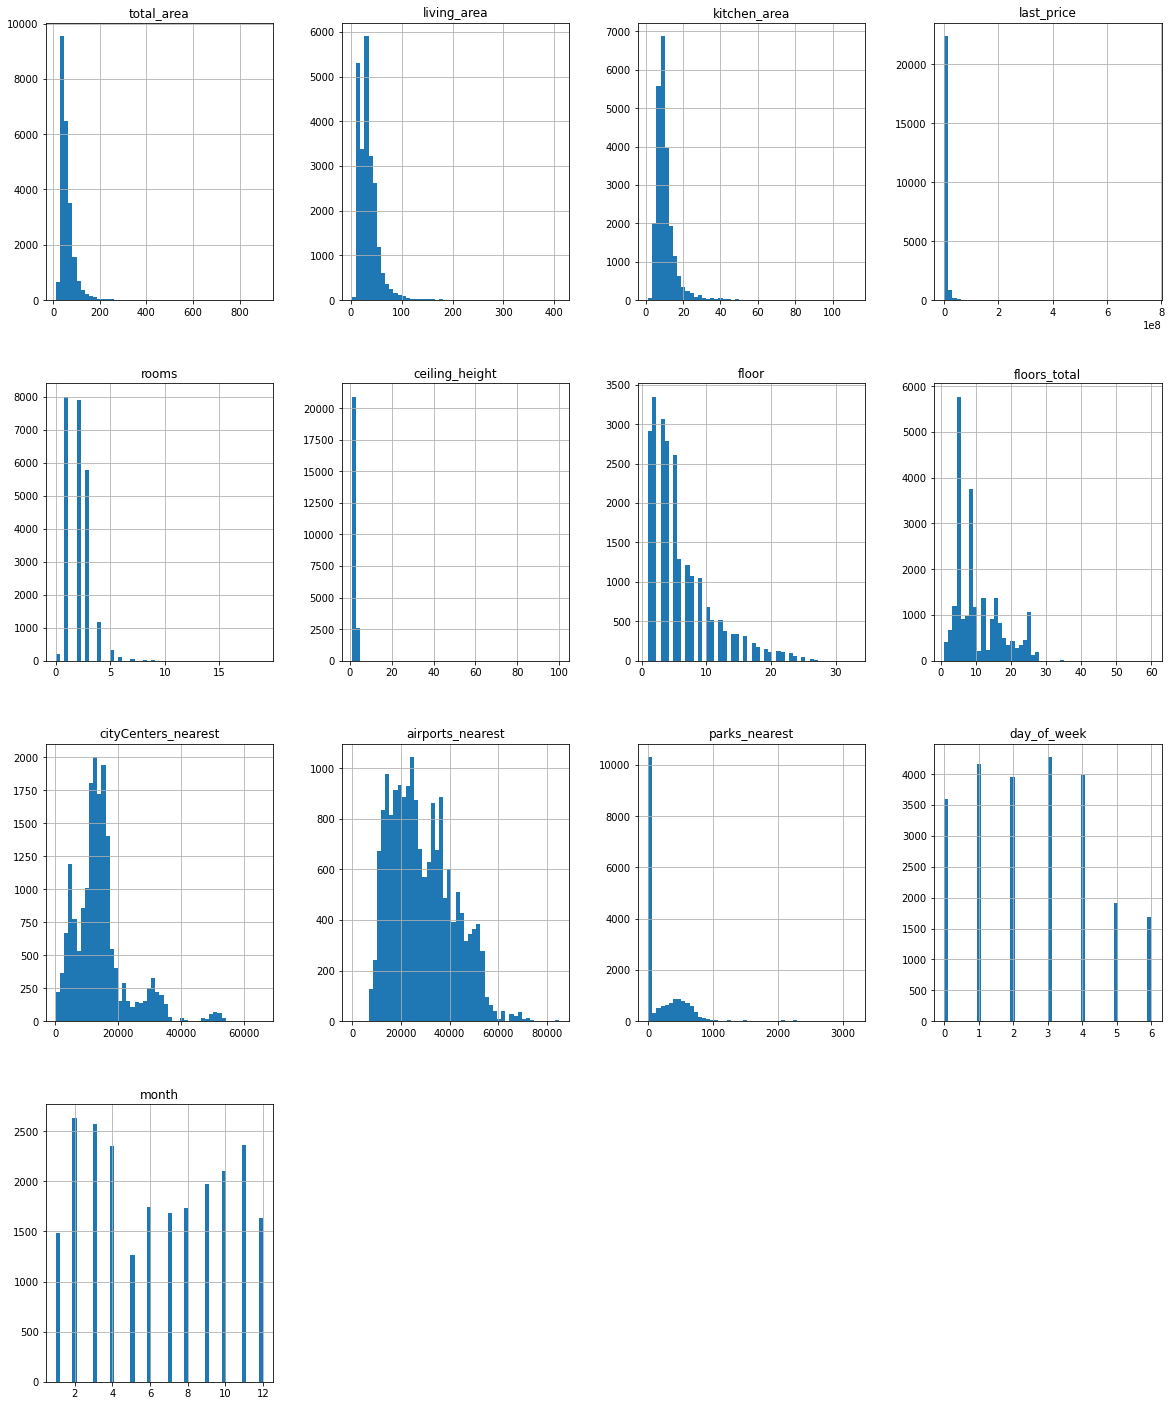

In [35]:
# построение гистограм для списка
data[fields_list].hist(bins=50, figsize=(20,25));

На графиках заметны аномалии в данных, но не очень понятно их количество и сложно сделать выводы можно ли обработать эти аномалии. 
Выведем таблицу со статистическими данными по каждому столбцу для лучшего понимания на какие параметры необходимо обратить внимание.

In [36]:
# создадим список столбцов с числовыми значениями
fields_list_2 = ['total_area', 'living_area', 'kitchen_area', 'last_price'
                , 'rooms', 'ceiling_height', 'floor', 'floors_total'
                , 'cityCenters_nearest', 'airports_nearest', 'parks_nearest'
                , 'day_of_week', 'month']

# создадим функцию для расчета статистики по исследуемым столбцам
def parametrs_stats(data, fields_list_2):
    # создаем список для хранения информации о каждом поле
    stats = []

    for field in fields_list_2:
        # вычесление основных статистических метрик
        total_values = data[field].count()
        min_value = data[field].min()
        max_value = data[field].max().round(2)
        median_value = data[field].median()
        mean_value = data[field].mean().round(2)
        nunique_value = data[field].nunique()

        # Вычисление границ и количества элементов за пределами
        left_border = data[field].quantile(0.01).round(2)  # Левая граница (1-й перцентиль)
        right_border = data[field].quantile(0.99).round(2) # Правая граница (99-й перцентиль)

        # Подсчет количества элементов за пределами границ
        left_number = data[data[field] < left_border].shape[0]
        right_number = data[data[field] > right_border].shape[0]

        # Добавление информации о поле в список
        stats.append({
            'field': field,
            'total_values': total_values,
            'min': min_value,
            'max': max_value,
            'median': median_value,
            'mean': mean_value,
            'nunique': nunique_value,
            'left_border': left_border,
            'left_number': left_number,
            'right_border': right_border,
            'right_number': right_number
        })
            
    stats_data = pd.DataFrame(stats)
    return stats_data

parametrs_stats(data, fields_list_2)

,field,total_values,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,total_area,23565,12.0,9.000000e+02,52.00,60.32,2159,25.32,236,197.45,236
1,living_area,23565,2.0,4.097000e+02,30.00,34.59,2236,13.00,211,122.00,235
2,kitchen_area,23565,1.3,1.120000e+02,9.00,10.50,1393,4.38,207,35.54,236
3,last_price,23565,12190.0,7.630000e+08,4646000.00,6540058.26,2925,1000000.00,225,36000000.00,235
4,rooms,23565,0.0,1.900000e+01,2.00,2.07,17,1.00,194,5.00,194
5,ceiling_height,23565,1.0,1.000000e+02,2.65,2.72,183,2.50,73,3.60,225
6,floor,23565,1.0,3.300000e+01,4.00,5.88,33,1.00,0,23.00,147
7,floors_total,23565,1.0,6.000000e+01,9.00,10.68,36,2.00,25,26.00,218
8,cityCenters_nearest,18064,181.0,6.596800e+04,13096.50,14192.66,7623,1326.26,181,50069.96,181
9,airports_nearest,18041,0.0,8.486900e+04,26757.00,28797.08,8251,9516.60,181,58501.00,181


В столбцах 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total' есть выбросы и строки с аномальными значениями. Если не исследовать и не обработать эти значения, то можно неверно оценить данные и сделать ошибочные выводы. Рассмотрим значения каждого столбца в отдельности, в случаях когда можно предположить природу искажения в данных приведем данные к нормальным значениям. В иных случаях удалим выбивающиеся значения.

In [37]:
# функция для расчета статистики по исследуемым столбцам
def one_parametr_stats(data, fields_list_2, show_boxplot=False):
    # вычесление основных статистических метрик
    total_values = data[fields_list_2].count()
    missing_rate = data[fields_list_2].isnull().mean() * 100
    min_value = data[fields_list_2].min()
    max_value = data[fields_list_2].max()
    median_value = data[fields_list_2].median()
    mean_value = data[fields_list_2].mean().round(2)
    nunique_value = data[fields_list_2].nunique()

    # Вычисление границ и количества элементов за пределами
    left_border = data[fields_list_2].quantile(0.01).round(2)  # Левая граница (1-й перцентиль)
    right_border = data[fields_list_2].quantile(0.99).round(2) # Правая граница (99-й перцентиль)

    # Подсчет количества элементов за пределами границ
    left_number = data[data[fields_list_2] < left_border].shape[0]
    right_number = data[data[fields_list_2] > right_border].shape[0]

    # Добавление информации о поле
    stats = {
        'field': fields_list_2,
        'total_values': total_values,
        'missing_rate': f"{missing_rate:.2f}%",
        'min': min_value,
        'max': max_value,
        'median': median_value,
        'mean': mean_value,
        'nunique': nunique_value,
        'left_border': left_border,
        'left_number': left_number,
        'right_border': right_border,
        'right_number': right_number
    }
    
    # Вывод статистики
    stats_df = pd.DataFrame([stats])
   
    # Построение boxplot если show_boxplot=True
    if show_boxplot:
        plt.figure(figsize=(10, 4))
        plt.boxplot(data[fields_list_2].dropna(), vert=False)
        plt.title(f'Boxplot for {fields_list_2}')
        plt.xlabel(fields_list_2)
        plt.grid(True)
        plt.show()

    return stats_df

#### Обработка выбросов и аномальных значений столбца 'total_area'

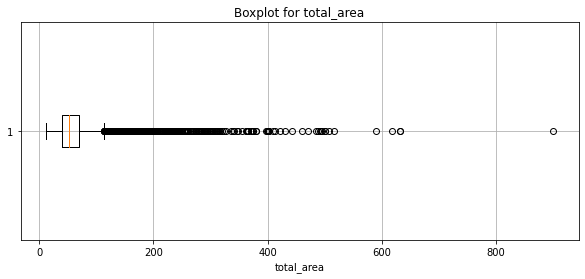

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,total_area,23565,0.00%,12.0,900.0,52.0,60.32,2159,25.32,236,197.45,236


In [38]:
# построение графика распределения значений и вывод статистики по столбцу 'total_area'
one_parametr_stats(data, 'total_area', show_boxplot=True)

В данных есть объекты с общей площадью менее 25 квадратных метров. Это могут быть маленькие квартиры-студии, комнаты в коммунальных квартирах, коммерчексие помещения. Также в данных есть объекты с общей площадью более 200 метров. Такие объекты вполне реальны и возможно в данных о них ошибок нет. Как правило большую площадь имеет элитное жилье или коммерческие помещения. Данные о них могут исказить общий анализ, поэтому будет логичнее убрать их из выборки.

In [39]:
# удаление из выборки строк со значениями столбца 'total_area' меньше 20 и больше 200 метров
data = data.loc[(data['total_area'] >= 25) & (data['total_area'] < 190)]

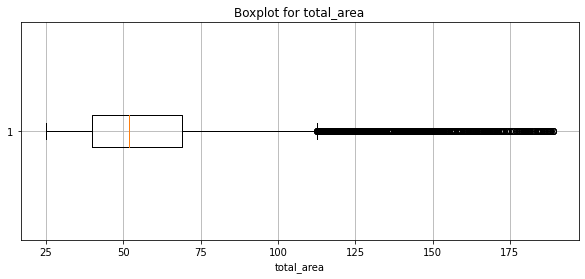

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,total_area,23115,0.00%,25.0,189.0,52.0,58.220001,1913,28.0,197,156.0,231


In [40]:
# построение графика распределения значений столбца 'total_area'
one_parametr_stats(data, 'total_area', show_boxplot=True)

#### Обработка выбросов и аномальных значений столбца 'kitchen_area'

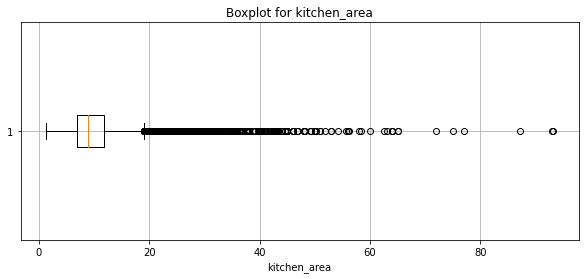

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,kitchen_area,23115,0.00%,1.3,93.199997,9.0,10.31,1277,4.9,220,31.5,231


In [41]:
# построение графика распределения значений и вывод статистики по столбцу 'kitchen_area'
one_parametr_stats(data, 'kitchen_area', show_boxplot=True)

В данных есть объекты как с очень большой, так и с очень маленькой кухонной площадью. Обычно доля кухонной длощади варьируется от 10 до 20%. Добавим столбец с расчетом доли жилой и кухонной площади от общей и создадим новую переменную, в которую выведем столбцы 'total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' чтобы посмотреть их взаимосвязь и попробовать привести данные к норме. 
Посмотрим ближе на строки с кухонной площадью более 40% от общей для поиска аномально больших площадей кухни. 

In [42]:
# добавление столбца с долей жилой площади от общей площади
data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(2)

In [43]:
# добавление столбца с долей кухонной площади от общей площади
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

In [44]:
# добавление столбца с сумммой долей жилой и кухонной площадей
data['total_ratio'] = (data['living_area_ratio'] + data['kitchen_area_ratio']).round(2)

In [45]:
# создаем переменную со столбцами 'total_area', 'living_area', 'kitchen_area',  'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

In [46]:
# выводим строки, где 'kitchen_area_ratio' больше 40%
selected_columns.query('kitchen_area_ratio > 0.4')

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
4,100.000000,32.00,41.000000,0.32,0.41,0.73
123,48.000000,14.00,23.799999,0.29,0.50,0.79
454,51.599998,12.70,23.100000,0.25,0.45,0.70
511,69.000000,13.00,50.000000,0.19,0.72,0.91
615,43.000000,10.00,20.000000,0.23,0.47,0.70
...,...,...,...,...,...,...
22980,155.399994,72.00,65.000000,0.46,0.42,0.88
23148,58.000000,20.00,28.000000,0.34,0.48,0.82
23208,37.000000,8.00,22.000000,0.22,0.59,0.81
23388,43.000000,12.00,20.000000,0.28,0.47,0.75


В данных 261 строка в которых доля кухонной площади превышает норму. В некоторых строках кухонная площадь превышает жилую. Это явно ошибка. Выведем строки, в которых доля кухонной площади превышает долю жилой.

In [47]:
# выводим строки, где 'kitchen_area_ratio' больше living_area_ratio
selected_columns.query('kitchen_area_ratio > living_area_ratio')

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
4,100.000000,32.00,41.000000,0.32,0.41,0.73
6,37.299999,10.60,14.400000,0.28,0.39,0.67
51,161.000000,38.00,50.000000,0.24,0.31,0.55
53,39.099998,15.40,15.500000,0.39,0.40,0.79
101,37.000000,12.00,13.000000,0.32,0.35,0.67
...,...,...,...,...,...,...
23208,37.000000,8.00,22.000000,0.22,0.59,0.81
23388,43.000000,12.00,20.000000,0.28,0.47,0.75
23481,37.290001,10.08,16.879999,0.27,0.45,0.72
23573,47.669998,13.59,17.870001,0.29,0.37,0.66


Таких строк 346, заменим значения столбца 'kitchen_area' на значения столбца 'living_area'.

In [48]:
# условие для замены значений
condition = data['kitchen_area_ratio'] > data['living_area_ratio']

# замена значений столбцов в соответствии с условием
data.loc[condition, ['kitchen_area', 'living_area']] = data.loc[condition, ['living_area', 'kitchen_area']].values          

Проверим сколько строк с долей кухонной площади более 40% осталось в выборке

In [49]:
# обновим переменную с выбранными столбцами 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

# выводим строки, где 'kitchen_area_ratio' больше 40%
selected_columns.query('kitchen_area_ratio > 0.4').head(20)

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
4,100.000000,41.000000,32.00,0.32,0.41,0.73
123,48.000000,23.799999,14.00,0.29,0.50,0.79
454,51.599998,23.100000,12.70,0.25,0.45,0.70
511,69.000000,50.000000,13.00,0.19,0.72,0.91
615,43.000000,20.000000,10.00,0.23,0.47,0.70
680,43.000000,23.000000,9.00,0.21,0.53,0.74
696,34.689999,23.430000,23.43,0.68,0.68,1.36
723,81.000000,36.599998,30.00,0.37,0.45,0.82
779,40.400002,19.900000,11.00,0.27,0.49,0.76
978,65.000000,27.000000,20.00,0.31,0.42,0.73


В данных видим, что есть строки в которых жилая и кухонная площадь равны. Это маловероятно в реальной жизни и в данных скорее всего ошибки. Однако не везде можно логически предположить как и на какое значение заменить данные с ошибкой. Лучше удалить из выборки строки где жилая и кухонная площади равны.

In [50]:
# Удаление строк, где kitchen_area равно living_area
data = data.loc[data['kitchen_area'] != data['living_area']]

<div class="alert alert-info">Проверим сколько в выборке осталось строк с аномально большой площадью кухни, где площадь кухни больше 20 кв.м. и ее доля <b>более 40%</b> от общей площади объекта.</div>

In [51]:
# обновим переменную с выбранными столбцами 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

# выводим строки, где 'kitchen_area' больше 20 кв.м.
selected_columns.query('(kitchen_area > 20) & (kitchen_area_ratio > 0.4)')

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
4,100.000000,41.000000,32.000000,0.32,0.41,0.73
723,81.000000,36.599998,30.000000,0.37,0.45,0.82
1060,50.000000,39.000000,20.500000,0.78,0.41,1.19
1336,66.000000,35.000000,25.000000,0.38,0.53,0.91
2171,65.900002,30.000000,21.799999,0.33,0.46,0.79
...,...,...,...,...,...,...
20871,140.000000,70.000000,58.000000,0.50,0.41,0.91
20930,107.000000,45.000000,31.000000,0.29,0.42,0.71
21081,85.199997,41.099998,38.000000,0.45,0.48,0.93
21331,93.400002,49.400002,24.299999,0.26,0.53,0.79


Таких строк 82, удалим их как аномальные значения.

In [52]:
# условие для удаления строк
condition = (data['kitchen_area'] > 20) & (data['kitchen_area_ratio'] > 0.4)

# удаление строк, удовлетворяющих условию
data = data.drop(data[condition].index)

Проверим количество строк, в котрых площадь кухни превышает 30 кв.м.

In [53]:
# подсчет строк, где 'kitchen_area' больше 30 метров
len(data.query('kitchen_area > 30'))

177

Таких строк 177, удалим их как аномальные значения.

In [54]:
# удаление строк, где kitchen_area больше 30 кв.м.
data = data.loc[data['kitchen_area'] < 30]

Вернемся к строкам с кухонной площадью менее 5 метров. Выведем таблицу с площадями, где значения 'kitchen_area' меньше 4 метров

In [55]:
# обновим переменную с выбранными столбцами 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

# выводим строки, где 'kitchen_area' меньше 5 метров
selected_columns.query('kitchen_area < 5').head(20)

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
76,55.099998,38.400002,4.90,0.70,0.09,0.79
144,27.000000,15.500000,4.73,0.57,0.18,0.75
298,42.799999,30.000000,4.50,0.70,0.11,0.81
322,25.000000,14.270000,4.38,0.57,0.18,0.75
349,25.000000,17.000000,4.38,0.68,0.18,0.86
422,55.200001,38.500000,4.50,0.70,0.08,0.78
440,27.110001,24.750000,4.75,0.91,0.18,1.09
546,25.000000,14.270000,4.38,0.57,0.18,0.75
608,25.000000,14.270000,4.38,0.57,0.18,0.75
780,26.100000,14.900000,4.57,0.57,0.18,0.75


Таких строк 273 и по данным таблицы видно, что есть объекты, в которых общая площадь значительно превышает сумму кухонной и жилой площадей. Это могут быть ошибки в данных. Проверим строки, в которых сумма кухонной и жилой площадей равна или меньше 50% от общей площади.

In [56]:
# выводим строки, где 'kitchen_area' меньше 5 метров
selected_columns.query('total_ratio <= 0.5').head(10)

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
248,31.000000,10.000000,5.430000,0.32,0.18,0.50
331,124.800003,37.099998,14.100000,0.30,0.11,0.41
567,106.900002,38.599998,10.000000,0.36,0.09,0.45
1253,127.000000,29.410000,17.530001,0.23,0.14,0.37
2129,96.739998,30.570000,12.000000,0.32,0.12,0.44
2201,136.360001,35.880001,24.030001,0.26,0.18,0.44
2292,52.000000,16.000000,9.000000,0.31,0.17,0.48
3242,41.000000,11.000000,3.000000,0.07,0.27,0.34
3524,122.699997,45.900002,10.200000,0.37,0.08,0.45
4031,105.400002,30.100000,13.400000,0.29,0.13,0.42


Для таких строксложно предположить логическую замену, поэтому удалим их из выборки.

In [57]:
# удаление строк, где total_ratio меньше 50%
data = data.loc[data['total_ratio'] > 0.5]

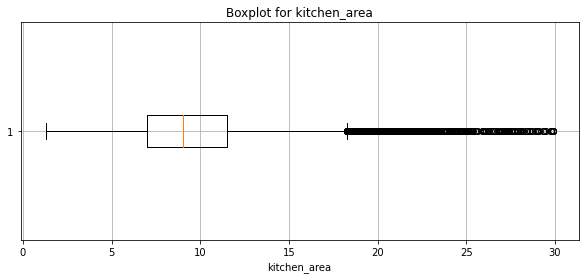

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,kitchen_area,22708,0.00%,1.3,29.9,9.0,9.85,1137,4.9,220,24.0,221


In [58]:
# построение графика распределения значений и вывод статистики по столбцу 'kitchen_area' для проверки распределения
one_parametr_stats(data, 'kitchen_area', show_boxplot=True)

Распределение изменилось и приблизилось к нормальному. На этом обработку данных по столбцу 'kitchen_area' закончим.

#### Обработка выбросов и аномальных значений столбца 'living_area'

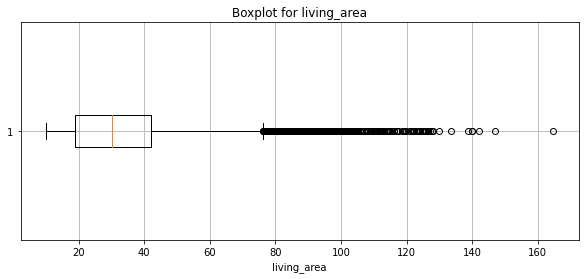

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,living_area,22708,0.00%,10.0,164.699997,30.0,33.130001,1977,14.0,133,92.34,227


In [59]:
# построение графика распределения значений и вывод статистики по столбцу 'living_area'
one_parametr_stats(data, 'living_area', show_boxplot=True)

В данных остались строки, в которых жилая площадь имеет аномально высокие и низкие значения. В среднем доля жилой площади от общей варьируется от 50% до 70%. Учтем, что в выборке могут быть строки с объектами типа студий или объектами с открытой планировкой, где указанная доля жилой площади может превышать 70%, и выведем данные по строкам с долей жилой площади более 80%.

In [60]:
# обновим переменную с выбранными столбцами 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

# выведем количество строк данных, где 'living_area_ratio' больше 80%
len(selected_columns.query('living_area_ratio > 0.8'))

150

In [61]:
selected_columns.query('living_area_ratio > 0.8').head(20)

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
184,30.200001,26.100000,6.20,0.86,0.21,1.07
424,98.000000,88.000000,17.16,0.90,0.18,1.08
440,27.110001,24.750000,4.75,0.91,0.18,1.09
551,31.590000,30.549999,9.28,0.97,0.29,1.26
601,53.700001,48.299999,7.00,0.90,0.13,1.03
1155,38.000000,33.000000,12.00,0.87,0.32,1.19
1776,64.000000,54.000000,10.00,0.84,0.16,1.00
1854,60.200001,55.000000,14.84,0.91,0.25,1.16
1992,37.400002,36.400002,8.60,0.97,0.23,1.20
2131,62.000000,50.000000,9.00,0.81,0.15,0.96


В данных 150 строк, в которых доля жилой площадей превышает 80% от общей и в части строк суммарная кухонная и жилая площадь превышает общую. Проверим такие строки.

In [62]:
# выведем строки, где 'total_ratio' больше или равно 100% 
selected_columns.query('total_ratio >= 1')

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
184,30.200001,26.100000,6.20,0.86,0.21,1.07
220,37.000000,28.000000,9.00,0.76,0.24,1.00
424,98.000000,88.000000,17.16,0.90,0.18,1.08
440,27.110001,24.750000,4.75,0.91,0.18,1.09
551,31.590000,30.549999,9.28,0.97,0.29,1.26
...,...,...,...,...,...,...
22963,102.000000,78.000000,24.00,0.76,0.24,1.00
23102,66.000000,55.500000,11.56,0.84,0.18,1.02
23202,67.919998,63.000000,13.04,0.93,0.19,1.12
23297,48.200001,42.200001,6.00,0.88,0.12,1.00


Таких строк 155 и судя по данным таблицы сложно предположить логическую замену данных. Удалим эти строки.

In [63]:
# удаление строк, где total_ratio меньше 50%
data = data.loc[data['total_ratio'] < 1]

Посмотрим ближе на строки, в которых жилая площадь превышет 120 кв.м.

In [64]:
# обновим переменную с выбранными столбцами 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

# выведем строки, где 'living_area' больше 120 м 
selected_columns.query('living_area >= 120')

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
417,178.000000,126.599998,19.400000,0.71,0.11,0.82
648,183.699997,138.800003,13.300000,0.76,0.07,0.83
670,178.000000,125.000000,16.000000,0.70,0.09,0.79
807,181.500000,125.099998,16.900000,0.69,0.09,0.78
1067,158.600006,125.000000,25.000000,0.79,0.16,0.95
1813,179.000000,126.400002,20.900000,0.71,0.12,0.83
1943,184.399994,125.699997,23.100000,0.68,0.13,0.81
2039,162.800003,121.599998,15.900000,0.75,0.10,0.85
2261,164.000000,125.900002,12.000000,0.77,0.07,0.84
2291,173.600006,125.500000,15.000000,0.72,0.09,0.81


In [65]:
# считаем количество строк, где 'living_area' больше 120 м
len(selected_columns.query('living_area >= 120'))

35

Таких строк 35 и судя по данным это реальные объекты. Так как строк мало удалим их для избежания влияния аномально больших по жилой площади объектов на анализ выборки.

In [66]:
# удаление строк, где living_area больше 120 кв.м.
data = data.loc[data['living_area'] < 120]

Вернемся к строкам, в которых значения в столбце 'living_area' менее 14 кв. м.

In [67]:
# обновим переменную с выбранными столбцами 
selected_columns = data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio', 'total_ratio' ]]

# выведем первые 20 строк, где 'living_area' меньше 14 кв.м.
selected_columns.query('(living_area < 14)')

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio,total_ratio
101,37.000000,13.00,12.00,0.32,0.35,0.67
414,41.410000,12.30,11.24,0.30,0.27,0.57
477,40.900002,13.00,11.40,0.32,0.28,0.60
895,28.000000,11.70,8.50,0.42,0.30,0.72
938,40.700001,13.30,11.50,0.33,0.28,0.61
...,...,...,...,...,...,...
22814,33.000000,12.00,8.00,0.36,0.24,0.60
23014,28.299999,10.90,7.30,0.39,0.26,0.65
23055,33.000000,13.05,9.75,0.40,0.30,0.70
23235,43.849998,13.70,11.20,0.31,0.26,0.57


Похоже это реальные объекты. Проверим есть ли влияние этих строк на распределение значений.

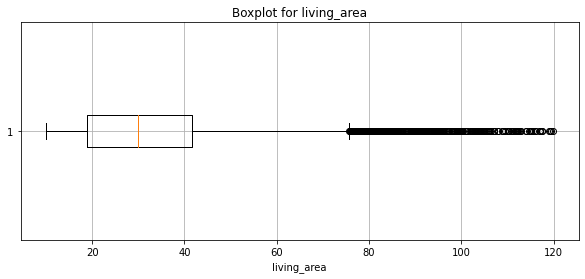

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,living_area,22518,0.00%,10.0,119.900002,30.0,32.919998,1939,14.0,133,90.0,220


In [68]:
# построение графика распределения значений и вывод статистики по столбцу 'living_area'
one_parametr_stats(data, 'living_area', show_boxplot=True)

Распределение блико к нормальному, можно оставить данные как есть.

#### Обработка выбросов и аномальных значений столбца 'rooms'

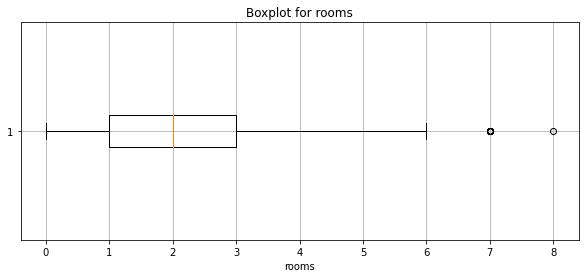

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,rooms,22518,0.00%,0,8,2.0,2.02,9,1.0,123,5.0,54


In [69]:
# построение графика распределения значений и вывод статистики по столбцу 'rooms'
one_parametr_stats(data, 'rooms', show_boxplot=True)

В большинстве случаев количество комнат указано в диапазоне от 1 до 3. Однако есть одна строка с количеством комнат 7. Удалим эту строку из выборки, влияния на дальнейший анализ удаление этой строки не окажет.

In [70]:
data = data.loc[data['rooms'] < 6]

В данных есть строки с объектами, в которых количество комнат ноль. Логично предположить что в этих строках могут быть квартиры студии, в которых по сути одна комната, и квартиры с открытой планировкой. Поверим сколько таких объектов.

In [71]:
# подсчет строк, где значение столбца 'rooms' равно нулю и значение столбца 'open_plan' равно True
len(data.query('(rooms == 0) & (open_plan == True)'))

41

In [72]:
# выводим первые 20 строк данных, где 'living_area' меньше 13 и отсортированные по возрастанию значений 'living_area'
len(data.query('(rooms == 0) & (studio == True)'))

82

Так и есть. Для корректной замены значений посмотрим какие уникальные значения столбца 'rooms' в строках, где значение столбца 'studio' равно True.

In [73]:
# Выбор строк, где studio равно True и получение уникальных значений из столбца rooms
data.loc[data['studio'] == True, 'rooms'].unique()

array([0, 1])

Уникальные значения столбца 'rooms' в строках, где значение столбца 'studio' равно True только 0 и 1. Заменим все значения столбца 'rooms' в этих строках на 1.

In [74]:
data.loc[data['studio'] == True, 'rooms'] = 1

Теперь для корректной замены значений посмотрим какие уникальные значения столбца 'rooms' в строках, где значение столбца 'open_plan' равно True.

In [75]:
# выбор строк, где open_plan равно True и получение уникальных значений из столбца rooms
data.loc[data['open_plan'] == True, 'rooms'].unique()

array([0, 1, 3, 2, 5, 4])

В данном случае в столбце 'rooms' может быть указано не только 1. Можно предположить что количество комнат указывается в зависимости от площади объекта. Проверим какая максимальная общая площадь в строках этого среза и как распределяется медиана общей площади в зависимости от указанного значения в столбце 'rooms'.

In [76]:
# нахождение максимального значения столбца 'total_area' в отфильтрованных данных
data[(data['open_plan'] == True) & (data['rooms'] == 0)]['total_area'].max() 

42.63

In [77]:
# создание сводной таблицы с медианными значениями столбца 'total_area' в разбивке по значениям столбца 'rooms'
(
    data.loc[data['open_plan'] == True]
    .pivot_table(index=['open_plan', 'rooms'], values='total_area', aggfunc='median')
)

total_area
open_plan rooms            
True      0       27.500000
          1       39.000000
          2       51.000000
          3       61.750000
          4       97.199997
          5      157.000000

Максимальная общая площадь объектов в строках, где rooms равно 0 42. 63 кв.м. Судя по медианным данным общей площади в разбивке по количеству комнат в объектах с открытой планировкой, можем заменить оставшиеся значения 0 в столбце 'rooms' на 1.

In [78]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

Проверим изменения в распределении после внесенных изменений.

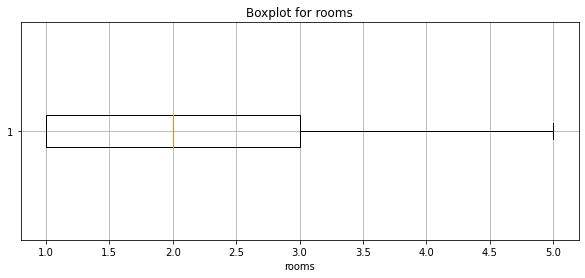

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,rooms,22464,0.00%,1,5,2.0,2.02,5,1.0,0,4.0,222


In [79]:
# построение графика распределения значений и вывод статистики по столбцу 'rooms'
one_parametr_stats(data, 'rooms', show_boxplot=True)

Распределение значений столбца 'rooms' приведено к нормальному, на этом можно закончить обработку данного столбца.

#### Обработка выбросов и аномальных значений столбца 'ceiling_height'

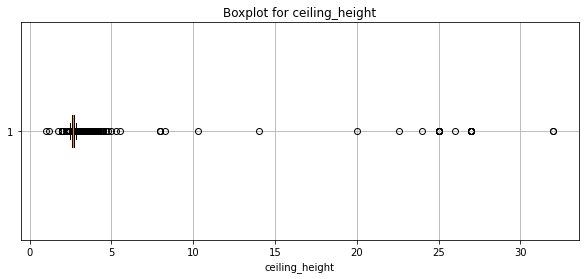

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,ceiling_height,22464,0.00%,1.0,32.0,2.65,2.71,165,2.5,72,3.5,222


In [80]:
# построение графика распределения значений и вывод статистики по столбцу 'ceiling_height'
one_parametr_stats(data, 'ceiling_height', show_boxplot=True)

В данных есть строки с указанной высотой потолков более 20. Вероятнее всего это ошибка в данных и высота указана не в метрах, а в дециметрах. Это можно исправить переведя значения из дециметров в метры.

In [81]:
# перевод значений в 'ceiling_height' из дециметров в метры
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] *= 0.1

Также в данных есть строки со значением в столбце ceiling_height более 3.5 метров. В старинных зданиях и элитных домах высота потолков может достигать 4 метров, а в многоуровневые квартиры в новостройках с указанием максимальной высоты потолков, коммерческих и промышленных побъектах может быть и более 4 метров. Однако это редкие случаи и такие строки лучше удалить для нормализации распределения значений столбца ceiling_height.

Также удалим строки, где высота потолков указана менее 2,5 метров. Их мало и это не повлияет на дальнейший анализ, но поможет привести данные к нормальному распределению.

In [82]:
# удаление строк с объектами, высота потолков в которых менее 2.5 м и более 3.5 метров
data = data.loc[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] < 3.5)]

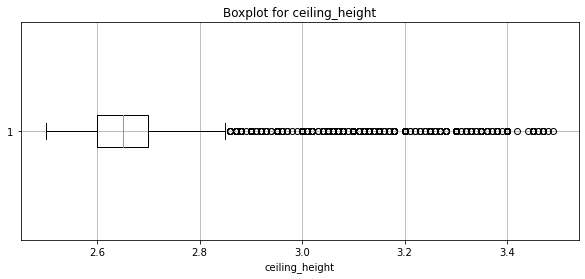

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,ceiling_height,22091,0.00%,2.5,3.49,2.65,2.67,96,2.5,0,3.3,132


In [83]:
# построение графика распределения значений и вывод статистики по столбцу 'ceiling_height'
one_parametr_stats(data, 'ceiling_height', show_boxplot=True)

#### Обработка выбросов и аномальных значений столбца 'floors_total'

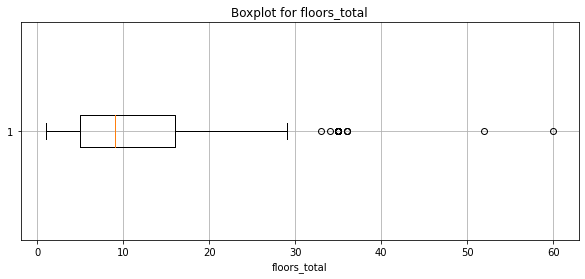

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,floors_total,22091,0.00%,1,60,9.0,10.8,35,2.0,21,26.0,210


In [84]:
# построение графика распределения значений и вывод статистики по столбцу 'floors_total'
one_parametr_stats(data, 'floors_total', show_boxplot=True)

Объектов с общей этажностью более 30 этажей всего несколько, поэтому мы можем удалить эти строки. Это не окажет последствий для анализа, но поможет привести данные к нормальному распределению.

In [85]:
# код для удаления строк с общей этажностью более 30 этажей
data = data.loc[(data['floors_total'] <= 30)]

#### Обработка выбросов и аномальных значений столбца 'last_price'

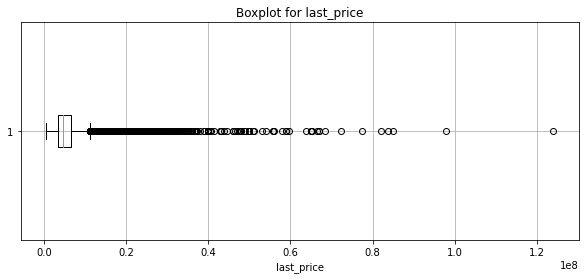

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,last_price,22062,0.00%,430000.0,124000000.0,4550000.0,5659654.86,2638,1000000.0,213,23839000.0,221


In [86]:
# построение графика распределения значений и вывод статистики по столбцу 'last_price'
one_parametr_stats(data, 'last_price', show_boxplot=True)

В данных есть строки с аномально высокими и низкими значениями в столбце 'last_price'. Рассмотрим их подробнее. Начнем со значений более 25 000 000.

In [87]:
# подсчет количества строк со значением 'last_price' больше или равным 25 000 000
len(data.loc[(data['last_price'] >= 25000000)])

201

In [88]:
# вывод строк, где 'last_price' больше или равно 25 000 000 с сортировко по убыванию в столбце 'last_price'
data.loc[(data['last_price'] >= 25000000)].sort_values(by='last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,first_day_year,cost_per_square_meter,day_of_week,month,year,floor_category,cityCenters_nearest_km,living_area_ratio,kitchen_area_ratio,total_ratio
4996,20,124000000.0,124.500000,2017-10-12,4,3.00,4,67.199997,2,False,...,2017,995983.94,3,10,2017,другой,2.0,0.54,0.16,0.70
16590,10,98000000.0,155.000000,2017-12-16,3,2.65,8,88.500000,6,True,...,2017,632258.06,5,12,2017,другой,5.0,0.57,0.18,0.75
11430,20,85000000.0,145.699997,2018-08-16,3,3.36,5,87.230003,5,True,...,2018,583390.54,3,8,2018,последний,7.0,0.60,0.14,0.74
10362,5,83820000.0,153.000000,2017-09-29,3,3.20,9,82.000000,8,True,...,2017,547843.14,4,9,2017,другой,2.0,0.54,0.07,0.61
6462,2,82000000.0,114.000000,2015-12-17,3,2.65,5,78.500000,4,True,...,2015,719298.25,3,12,2015,другой,3.0,0.69,0.18,0.87
15726,7,77349000.0,135.699997,2017-12-16,3,2.65,7,77.480003,5,True,...,2017,570000.01,5,12,2017,другой,6.0,0.57,0.18,0.75
11336,14,72375000.0,169.300003,2015-06-18,4,3.00,8,95.400002,4,True,...,2015,427495.56,3,6,2015,другой,7.0,0.56,0.13,0.69
16869,3,68500000.0,160.000000,2016-06-18,4,2.65,8,95.400002,7,True,...,2016,428125.00,5,6,2016,другой,7.0,0.60,0.14,0.74
7253,4,67000000.0,156.899994,2019-03-15,3,2.65,8,103.099998,8,True,...,2019,427023.60,4,3,2019,последний,6.0,0.66,0.10,0.76
20955,14,67000000.0,172.000000,2016-05-13,4,2.65,8,101.000000,7,True,...,2016,389534.88,4,5,2016,другой,7.0,0.59,0.10,0.69


Судя по данным в этих строках представлены объекты с достаточно большой площадью и на небольшом удалении от центра города. Вероятно тут нет ошибок и в этих строках данные об элитных, дорогостоящих объектах. Так как строк немного, но они значительно выбиваются по значениям 'last_price' их лучше удалить из выборки.

In [89]:
data = data.loc[(data['last_price'] < 25000000)]

Теперь рассмотрим строки, в которых значение last_price' меньше 1 000 000

In [90]:
# подсчет количества строк со значением 'last_price' больше или равным 1 000 000
len(data.loc[(data['last_price'] <= 1000000)])

233

In [91]:
# вывод строк, где 'last_price' больше или равно 1 000 000 с сортировко по возрастанию в столбце 'last_price'
data.loc[(data['last_price'] <= 1000000)].sort_values(by='last_price').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,first_day_year,cost_per_square_meter,day_of_week,month,year,floor_category,cityCenters_nearest_km,living_area_ratio,kitchen_area_ratio,total_ratio
17456,7,430000.0,30.400000,2019-04-22,1,2.65,2,16.000000,1,True,...,2019,14144.74,0,4,2019,первый,NaN,0.53,0.20,0.73
14911,5,430000.0,54.000000,2018-06-26,2,2.65,3,30.830000,3,True,...,2018,7962.96,1,6,2018,последний,NaN,0.57,0.18,0.75
16274,18,440000.0,40.000000,2018-07-10,1,2.65,5,22.840000,1,True,...,2018,11000.00,1,7,2018,первый,NaN,0.57,0.18,0.75
16219,14,450000.0,38.500000,2018-07-11,2,2.65,2,21.980000,1,True,...,2018,11688.31,2,7,2018,первый,NaN,0.57,0.18,0.75
17676,0,450000.0,36.500000,2018-02-01,1,2.65,5,17.299999,4,True,...,2018,12328.77,3,2,2018,другой,NaN,0.47,0.23,0.70
5698,7,450000.0,42.000000,2017-07-31,2,2.65,1,23.000000,1,True,...,2017,10714.29,0,7,2017,первый,NaN,0.55,0.14,0.69
9581,7,450000.0,43.400002,2018-08-31,2,2.65,5,30.299999,3,True,...,2018,10368.66,4,8,2018,другой,NaN,0.70,0.13,0.83
23484,11,470000.0,44.500000,2018-07-02,2,2.65,2,28.000000,2,True,...,2018,10561.80,0,7,2018,последний,NaN,0.63,0.17,0.80
21912,0,470000.0,37.000000,2018-02-18,1,2.65,3,21.129999,3,True,...,2018,12702.70,6,2,2018,последний,NaN,0.57,0.18,0.75
16032,8,480000.0,32.000000,2019-01-06,1,2.65,2,16.000000,1,True,...,2019,15000.00,6,1,2019,первый,NaN,0.50,0.18,0.68


Судя по данным, отфильтрованные строки вероятнее всего содержат данные об объектах в сельской местности и, вероятно, правдивы. Оставим их как есть.

Выведем график распределения значений и статистику столбца для проверки изменений.

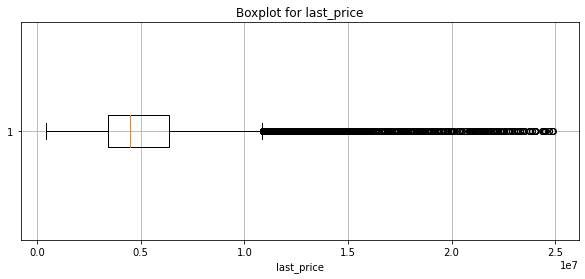

,field,total_values,missing_rate,min,max,median,mean,nunique,left_border,left_number,right_border,right_number
0,last_price,21861,0.00%,430000.0,24900000.0,4500000.0,5369234.03,2503,1000000.0,213,18000000.0,218


In [92]:
# построение графика распределения значений и вывод статистики по столбцу 'last_price'
one_parametr_stats(data, 'last_price', show_boxplot=True)

 <div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Хороший результат. Хочу добавить, что обычно размеры двухкомнатных квартир составляют от 50 до 100 квадратных метров, что и соответствует проведенному анализу.

Могу посоветовать на будущее хорошую статью по оформлению графиков:
    https://devpractice.ru/matplotlib-lesson-3-3-text-elements/



</div>

<div class="alert alert-info">На этом предобработку данных можно завершить, но перед тем как приступать к анализу необходимо проверить какая доля данных осталась от исходного количества после обработки.</div>

In [93]:
finish_data_shape = data.shape
ratio_data_shape = finish_data_shape[0] / start_data_shape[0]
ratio_data_shape

0.9224439849782691

<div class="alert alert-info">В данных осталось 92% строк от изначального количества. Этого достаточно для проведения анализа.</div>
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Отличный результат👍

</div>


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**

   Также важно посмотреть, какая доля от изначального количества данных осталась после фильтрации. Для этого рекомендую зафиксировать начальное количество данных в переменную с помощью метода shape, а затем использовать ее в рассчетах. Прикрепляю полезную ссылку: https://tonais.ru/library/poluchenie-formy-razmera-dataframe Обращаю внимание, что мы можем провести актуальный анализ, если у нас есть не менее 90 % от изначального числа данных

</div>


#### Анализ продолжительности продажи объекта недвижимости

Для изучения того, насколько быстро продаются объекты недвижимости рассчитаем среднее и медиану по столбцу 'days_exposition', а также построим его гистограмму.

In [94]:
# подсчет среднего значения
mean_days = data['days_exposition'].mean()
mean_days

177.39185430115992

In [95]:
# подсчет медианного значения
median_days = data['days_exposition'].median()
median_days

94.0

<AxesSubplot:>

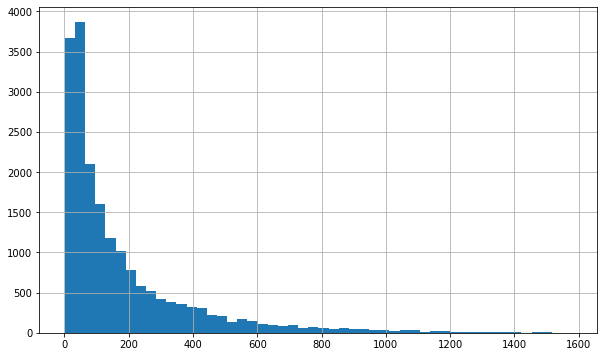

In [96]:
# построение гистограммы
data['days_exposition'].hist(bins=50, figsize=(10,6))

<AxesSubplot:>

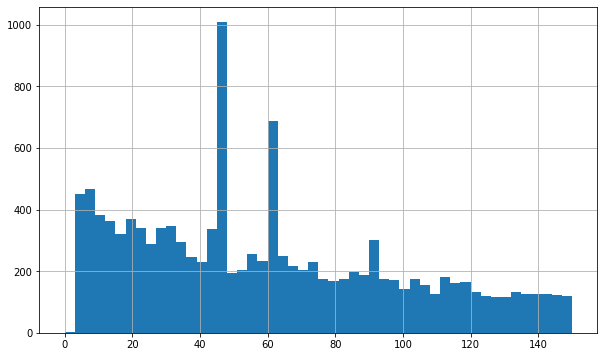

In [97]:
# построение гистограммы
data['days_exposition'].hist(bins=50, range=(0,150), figsize=(10,6))

<div class="alert alert-info">Судя по медианному значению и данным гистограммы, большинство объектов продаются в диапазоне до 200 дней. 
Однако при более близком рассмотрении пика в диапазоне 0-100 дней видно, что есть 2 резких пика на приблизительно 45, 60 день. Это может быть обусловлено не скоростью продажи, а техническими сбоями или условиями работы сервиса объявлений.
    
Построим диаграмму размаха для более точного изучения скорости продажи недвижимости.</div>

<AxesSubplot:>

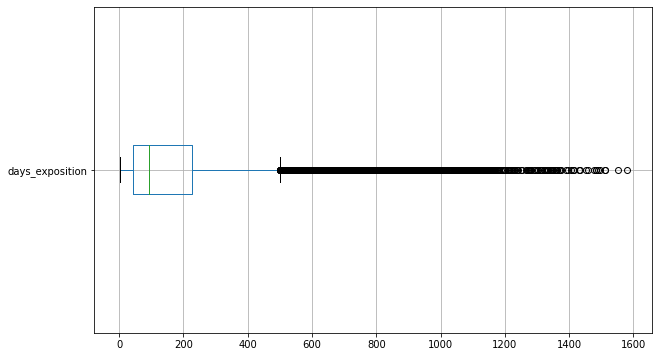

In [98]:
# построение боксплота для столбца days_exposition
data.boxplot(column='days_exposition', vert=False, figsize=(10, 6))

<div class="alert alert-info">Судя по данным диаграммы медианный срок продажи около 100 дней. Это означает, что половина объектов недвижимости продается в течение этого времени.
    
Наименьший период продажи (первый квартиль) составляет около 50 дней. Это означает, что 25% объектов недвижимости продаются за 50 или меньше дней.
Около 25% объектов продаются около 220 или более дней.
Размах между третьим и первым квартилями, составляет около 170 дней и находится в диапазоне от 50 до 220 дней. Этот размах показывает диапазон, в котором находятся средние 50% данных по времени продажи объектов недвижимости.
    
Также на диаграмме видно большое количество выбросов, начинающихся примерно с 500 дней, указывает на наличие объектов, которые значительно дольше находились в продаже. Это может быть связано с различными факторами, такими как завышенная цена, низкий спрос, или специфические характеристики объекта.
    
Таким образом, можно сделать вывод, что большинство объектов недвижимости продается в течение примерно 50-220 дней. Однако, существует значительное количество объектов, которые продаются намного дольше, что может свидетельствовать о проблемах с ценообразованием или спросом на эти объекты.</div>

<AxesSubplot:>

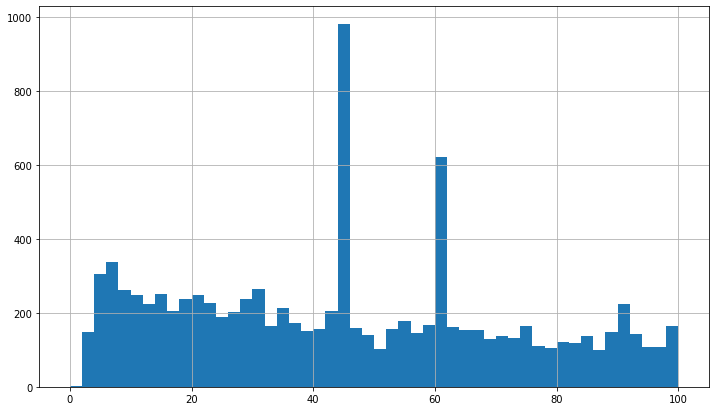

In [99]:
# Код ревьюера
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
      На гистограмме заметны пики примерно через 45, 60 и 90 дней после начала продажи. Можно посмотреть на условия размещения объявлений в Яндекс.Недвижимости - https://yandex.ru/support/realty/owner/home/add-ads-housing.html С учетом того, что после формирования датасета правила размещения поменялись, эти пики являются следами автоматического снятия объявлений - поэтому оценивать скорость продажи стоит по диаграмме размаха, взяв за быстрые продажи до 1 квартиля, за долгие после третьего




</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Теперь выводы верны👍

</div>


## Анализ факторов, влияющих на стоимость объекта недвижимости

Из факторов, наиболее влияющих на стоимость объекта недвижимости, можно выделить следующие:
- общая площадь;
- жилая площадь;
- кухонная площадь;
- этаж, на котором расположен объект;
- территориальное расположение объекта;
- удаленность от центра города;
- даты публикации объявления.

Изучим влияние каждого из этих факторов на стоимость объекта недвижимости. Начнем с общей площади.

### Влияние общей площади на стоимость объекта недвижимости

In [100]:
# сводная таблица с рассчетом зависимости средней цены от площади объекта
(
    data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
        .round(2)
)

,last_price
total_area,
25.000000,3169560.45
25.070000,3250000.00
25.200001,2850000.00
25.299999,2800000.00
25.330000,2170000.00
...,...
182.839996,16008000.00
183.000000,9900000.00
185.000000,14349500.00


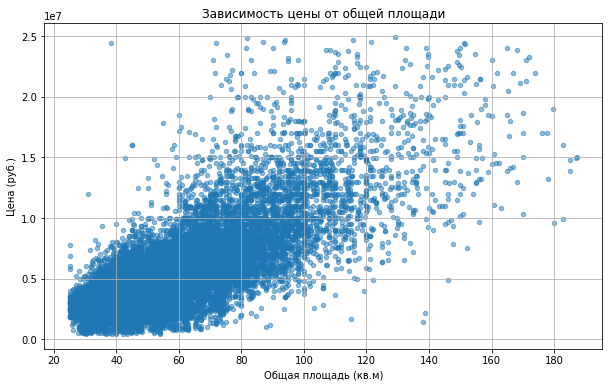

In [101]:
# график зависимости средней цены от площади объекта
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, figsize=(10, 6))

# добавление заголовков и сетки на график
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Цена (руб.)')
plt.grid(True)

Судя по данным есть положительная корреляция между ценой и общей площадью объекта. В целом, с увеличением площади квартиры, её цена также увеличивается. Однако эта зависимость не является строго линейной и имеет разброс данных. Это может указывать на влияние других факторов, таких как расположение, состояние недвижимости, год постройки, наличие ремонта и дополнительные удобства и т.д.

На графике видно, что большинство данных сосредоточено в диапазоне площадей от 20 до 80-100 квадратных метров и цен до 10 миллионов рублей. Это может указывать на то, что этот сегмент является наиболее популярным на рынке.

Объекты с общей площадью более 100 квадратных метров встречаются реже, но их цена варьируется более существенно. Это может свидетельствовать о том, что цена таких объектов больше зависит от уникальных характеристик каждой отдельной квартиры.

Так же на графике присутствуют выбросы (точки, значительно отличающиеся от основной массы данных), которые могут представлять либо элитные объекты. Например, некоторые объекты с площадью до 100 квадратных метров имеют цену выше 15 миллионов рублей.

### Влияние жилой площади на стоимость объекта недвижимости

In [102]:
# сводная таблица с рассчетом зависимости средней цены от жилой площади объекта
pivot_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='mean')
pivot_living_area

,last_price
living_area,
10.000000,2900000.0
10.760000,4310000.0
11.000000,3437952.4
11.200000,4790000.0
11.300000,3340000.0
...,...
114.000000,13900000.0
116.199997,17000000.0
117.099998,14000000.0


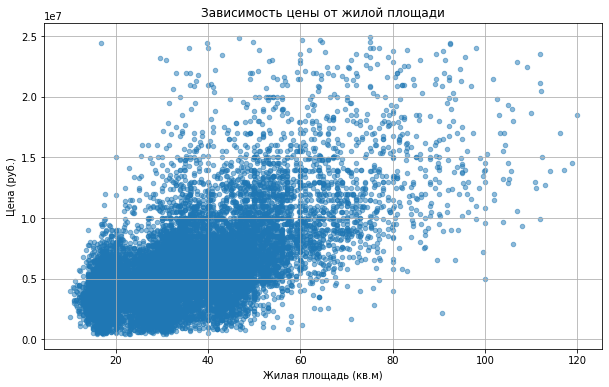

In [103]:
# график зависимости средней цены от жилой площади объекта
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, figsize=(10, 6))

# добавление заголовков и сетки на график
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Цена (руб.)')
plt.grid(True)

Так же как и на графике выше, видна положительная корреляция между жилой площадью и ценой объекат, но она выражена менее явно по сравнению с общей площадью. 

Для жилой площади существует широкий разброс цен и это свидетельствует о влиянии других факторов, например таких как местоположение, ремонт, "элитность" постройки, дополнительные удобства и т.д. Основная масса данных сосредоточена в диапазоне жилых площадей до 55-60 квадратных метров и цен до 10 миллионов рублей. Это подтверждает популярность сегмента объектов с общей площадью до 100 квадратных метров и в ценовом диапазоне до 10 млн. руб.

Объекты с жилой площадью более 60 квадратных метров встречаются реже, но цена их может значительно варьироваться, что может указывать на различия в качестве или расположении этих объектов.

### Влияние кухонной площади на стоимость объекта недвижимости

In [104]:
# сводная таблица с рассчетом зависимости средней цены от кухонной площади объекта
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean').round(2)
pivot_kitchen_area

,last_price
kitchen_area,
1.300000,4250000.00
2.000000,3556666.67
2.300000,2940000.00
2.890000,5967734.00
3.000000,3220000.00
...,...
29.400000,9190453.33
29.500000,16990000.00
29.770000,10335000.00


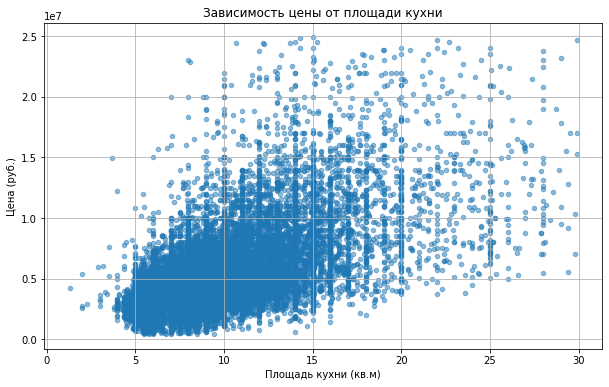

In [105]:
# график зависимости средней цены от кухонной площади объекта
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, figsize=(10, 6))

# добавление заголовков и сетки на график
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Цена (руб.)')
plt.grid(True)

Между площадью кухни и ценой объекта существует положительная корреляция как и в предыдущих параметрах. То, что квартиры с большей площадью кухни имеют более высокую цену может указывать на готовность покупателей платить больше за более просторные и удобные кухни.

Так же как и с жилой площадью, для кухонной площади наблюдается большой разброс цен. Это указывает на то, что на цену имеют большое влияние другие факторы, как и в случае в жилой площадью.

### Влияние количества комнат на стоимость объекта недвижимости

In [106]:
# сводная таблица с рассчетом зависимости средней цены от количества комнат
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean').round(2)
pivot_rooms

,last_price
rooms,
1,3802312.70
2,5292927.72
3,6941902.79
4,8985922.33
5,11125412.43


<AxesSubplot:title={'center':'last_price'}, xlabel='rooms'>

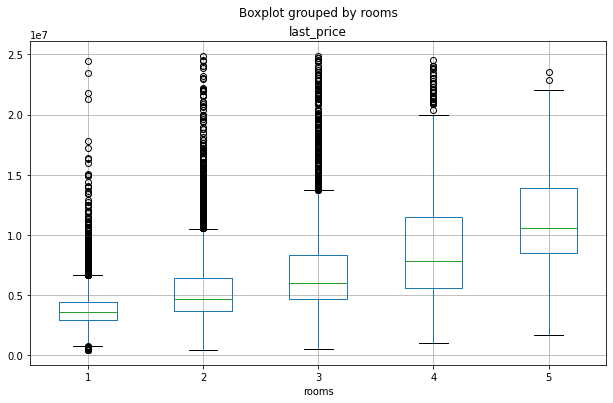

In [107]:
# построение боксплота зависимости средней цены от количества комнат
data.boxplot(column='last_price', by='rooms', figsize=(10, 6))

<div class="alert alert-info">С увеличением количества комнат средняя цена объектов недвижимости также увеличивается. Это видно из того, что медианы поднимаются по мере увеличения количества комнат. 

Для объектов с большим количеством комнат (4 и 5 комнаты) наблюдается более широкий диапазон цен. Это может указывать на наличие как более дешевых, так и дорогих объектов в этой категории. 

Для всех категорий количества комнат присутствуют выбросы, особенно для объектов с 1 и 2 комнатами. Это свидетельствует о наличии объектов с необычно высокими ценами по сравнению с общей массой данных.

Всё это указывает на то, что большое влияние на цену имеют другие факторы, такиех как общая площадь, расположение, состояние объекта и т.д.</div>

### Влияние категории этажа на стоимость объекта недвижимости

In [108]:
# сводная таблица с рассчетом зависимости средней цены от категории этажа
pivot_floor_category = data.pivot_table(index='floor_category', values='last_price', aggfunc='mean').round(2)
pivot_floor_category

,last_price
floor_category,
другой,5615338.68
первый,4354562.82
последний,4970569.67


<AxesSubplot:title={'center':'last_price'}, xlabel='floor_category'>

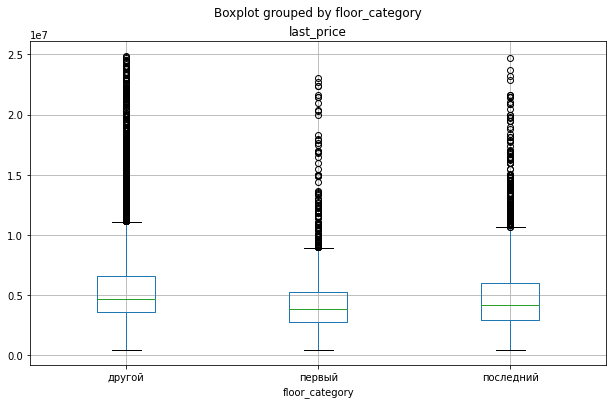

In [109]:
# построение боксплота зависимости средней цены от категории этажа
data.boxplot(column='last_price', by='floor_category', figsize=(10, 6))

Медианная цена для объектов, расположенных на этажах категории "другой" (не первый и не последний), расположена на графике выше, чем для объектов на первом и последнем этажах. Это может быть связано с тем, что крайние этажи предпочитают реже.

На графике также видно, что объекты на первом и втором этажах имеют достаточно большой разброс цен и довольно много выбросов. Это может указывать на наличие в этих категориях уникальных дорогостоящих объектов. А в категории "другие" широкий диапазон цен с меньшим количеством выбросов. Это указывает на стабильные и высокие цены в данной категории.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**

   Хорошие результаты. Отмечу, что скорее всего, низкую цену на квартиры на первом и последнем этажах можно аргументировать плохими условиями - шум от улиц и моторов лифта, охлаждаемость помещения зимой.

</div>

### Влияние дня публикации объявления на стоимость объекта недвижимости

In [110]:
# сводная таблица с рассчетом зависимости средней цены от дня публикации объявления
pivot_weekday = data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean').round(2)
pivot_weekday

,last_price
day_of_week,
0,5381971.41
1,5402256.22
2,5424347.93
3,5432869.24
4,5307118.80
5,5229750.00
6,5280288.65


<AxesSubplot:title={'center':'last_price'}, xlabel='day_of_week'>

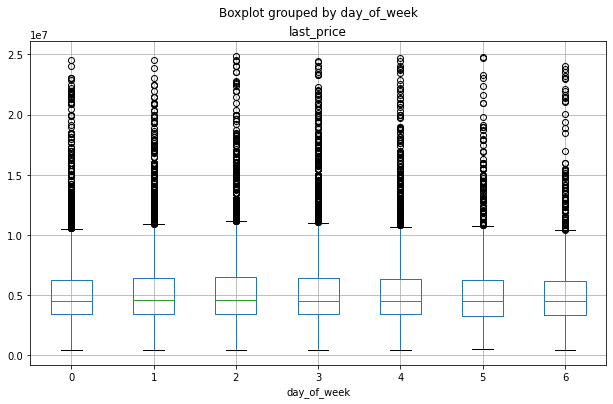

In [111]:
# построение боксплота зависимости средней цены от дня недели публикации объявления
data.boxplot(column='last_price', by='day_of_week', figsize=(10, 6))

Медианные цены практически не меняются в зависимости от дня недели. Это говорит о том, что день недели публикации объявления не оказывает значительного влияния на среднюю цену объекта.

На всех днях недели виден значительный разброс цен и множество выбросов, особенно в верхней части диапазона цен. Это означает, что цены на объекты недвижимости сильно варьируются и могут включать как очень дешевые, так и очень дорогие варианты в любой день недели.

Исходя из данных графика, можно заключить, что день недели, в который публикуется объявление о продаже недвижимости, не оказывает значимого влияния на цену объекта.

### Влияние месяца публикации объявления на стоимость объекта недвижимости

In [112]:
# сводная таблица с рассчетом зависимости средней цены от месяца публикации объявления
pivot_month = data.pivot_table(index='month', values='last_price', aggfunc='mean').round(2)
pivot_month

,last_price
month,
1,5381629.52
2,5348636.38
3,5331835.82
4,5435181.67
5,5397685.94
6,5148653.40
7,5263862.19
8,5361527.59
9,5597825.51


<AxesSubplot:title={'center':'last_price'}, xlabel='month'>

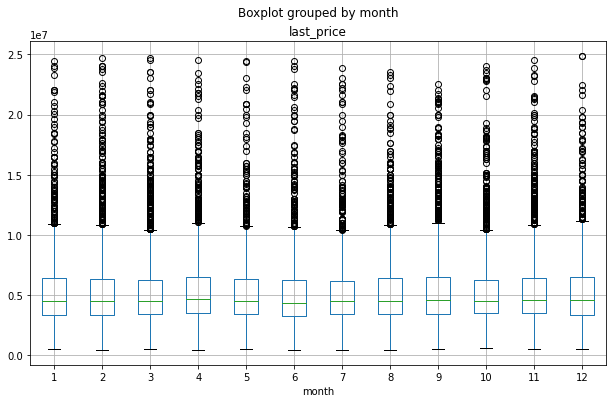

In [113]:
# построение боксплота зависимости средней цены от месяца публикации объявления
data.boxplot(column='last_price', by='month', figsize=(10, 6))

Значительных изменений в ценах на недвижимость по месяцам не наблюдается. Медианы остаются относительно стабильными на протяжении всего года.

В каждом месяце есть значительные выбросы, что указывает на наличие объектов с значительно более высокими ценами по сравнению с основной массой данных.

Все месяцы имеют схожие распределения, с максимальными ценами около 10 миллионов и более. Это свидетельствует о том, что нет явного месячного влиния на цену объекта недвижимости.

Таким образом, можно сделать вывод, что цены на недвижимость остаются относительно стабильными на протяжении всего года, с некоторыми выбросами высоких значений, вероятно, обусловлеными характеристиками отдельных объектов.

### Влияние года публикации объявления на стоимость объекта недвижимости

In [114]:
# сводная таблица с рассчетом зависимости средней цены от года публикации объявления
pivot_year = data.pivot_table(index='year', values='last_price', aggfunc='mean').round(2)
pivot_year

,last_price
year,
2014,8006460.46
2015,5926688.07
2016,5403036.82
2017,5248106.24
2018,5263575.17
2019,5672484.48


<AxesSubplot:title={'center':'last_price'}, xlabel='year'>

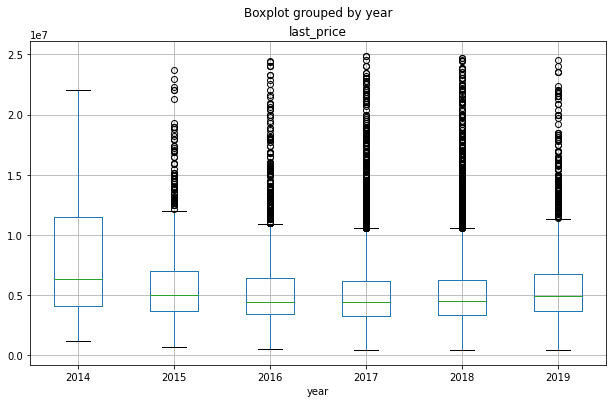

In [115]:
# построение боксплота зависимости средней цены от года публикации объявления
data.boxplot(column='last_price', by='year', figsize=(10, 6))

<div class="alert alert-info">В 2014 году медиана цены была значительно выше, чем в последующие годы. В 2015 году наблюдается резкое снижение медианы цены, что может свидетельствовать о существенных изменениях на рынке недвижимости в этот период. Начиная с 2016 года и до 2019 года, медианы цен остаются относительно стабильными.

Во всех годах наблюдаются значительные выбросы, что указывает на наличие объектов с значительно более высокими ценами по сравнению с основной массой данных. Однако, начиная с 2015 года, диапазон цен и уровень выбросов остаются практически неизменными.

Проверим как меняласть общая площадь недвижимости по годам.</div>

<AxesSubplot:title={'center':'total_area'}, xlabel='year'>

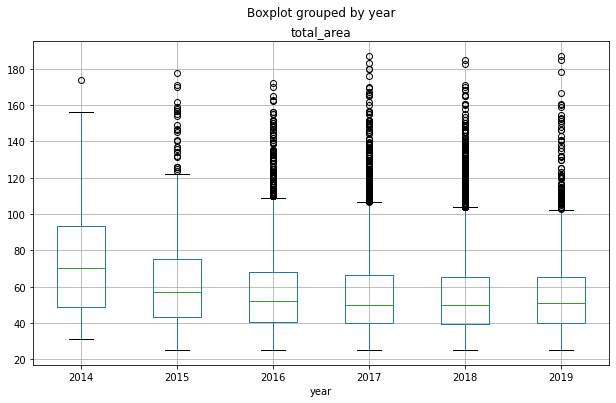

In [116]:
# построение боксплота зависимости средней общей площади от года публикации объявления
data.boxplot(column='total_area', by='year', figsize=(10, 6))

<div class="alert alert-info">По данным графика видно что общая площадь объектов недвижимости в продаже значительно снизилась в 2014 году и продолжила постепенно снижаться с 2015 по 2019 года. Это коррелирует с динамикой цен на недвижимость по годам. 

Таким образом, можно сделать вывод, что на рынке недвижимости произошли значительные изменения в 2014-2015 годах, как в отношении площадей объектов, так и в отношении цен. С 2016 цены стабилизировались и оставались на одном уровне до 2019 года, а площади недвижимости снижались вплоть до 2017 года, после чего также оставались относительно стабильными.</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
  Можно также посмотреть на динамику изменения площади продаваемых квартир по годам. Возможно, упала не столько цена, сколько площадь продаваемых квартир? 
</div>




<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Да, по графику заметно, что стали чаще покупать квартиры меньшей площади, ввиду их более высокой ликвидности👍

</div>


### Топ 10 населенных пунктов по количеству объявлений

In [117]:
# создание сводной таблицы со средней ценой с подсчетом количества объявлений в населенных пункатх
top_localities = data.pivot_table(index='locality_name', values='cost_per_square_meter', aggfunc=['mean', 'count'])

# переименование столбцов сводной таблицы
top_localities.columns = ['average_cost_per_sqm', 'number_of_rows']

# вывод топ 10 населенных пунктов по количеству объявлений
top_localities.sort_values(by='number_of_rows', ascending=False).head(10)

,average_cost_per_sqm,number_of_rows
locality_name,,
Санкт-Петербург,108923.330241,14264
поселок Мурино,84833.043333,510
поселок Шушары,78123.051799,428
Всеволожск,68591.468189,381
Пушкин,101540.360708,339
Колпино,75417.392801,332
поселок Парголово,90359.044750,320
Гатчина,68784.225686,299
деревня Кудрово,92155.760925,281


Санкт-Петербург имеет самую высокую среднюю стоимость за квадратный метр - около 109 тыс. руб. Это ожидаемо, так как Санкт-Петербург является крупным городом с высоким спросом на недвижимость.

Пушкин и деревня Кудрово также имеют высокую стоимость за квадратный метр - около 101 тыс. руб. и 92 тыс. руб. соответственно. Эти районы находятся близко к Санкт-Петербургу, а цены на недвижимость там менее высокие. 

Поселок Мурино и поселок Шушары имеют среднюю стоимость около 85 тыс. руб. и 78 тыс. руб. соответственно, что также свидетельствует о высоком спросе на жилье в этих пригородах.

Выборг имеет самую низкую среднюю стоимость за квадратный метр - около 58 тыс. руб. Это может быть связано с удаленностью от крупных городов (в частночти Санкт-Петербурга), более низким спросом на недвижимость.

Санкт-Петербург также лидирует по количеству объявлений - более 14 тыс. объектов. Это значительно больше, чем в любом другом населенном пункте, что подтверждает высокий спрос и предложение в городе. Поселок Мурино и поселок Шушары имеют второе и третье места по количеству предложений - 510 и 428 объектов соответственно, что показывает популярность этих пригородов.

Исходя из этого можно заключить, что стоимость недвижимости значительно варьируется в зависимости от местоположения, причем самые высокие цены наблюдаются в Санкт-Петербурге, а наиболее доступные - в Выборге. Большое количество предложений в Санкт-Петербурге и его пригородах свидетельствует о высоком спросе на жилье в этих районах.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно

</div>


### Влияние отдаления от центра города на стоимость объекта недвижимости в г. Санкт-Петербург

Рассмотрим вариации цен на недвижимость в Санкт-Петербурге в зависимости от удаления от центра города.

In [118]:
# Фильтруем только квартиры в Санкт-Петербурге
spb_apartments = data[data['locality_name'] == 'Санкт-Петербург']

In [119]:
# вывод сводной таблицы зависимости средней цены объекта от удаления от центра Санкт-Петербурга
(
    spb_apartments.pivot_table(index='cityCenters_nearest_km',
                               values='last_price',
                               aggfunc='mean')
    .round(2)
)

,last_price
cityCenters_nearest_km,
0.0,8948750.00
1.0,10142066.11
2.0,9945857.14
3.0,8899285.93
4.0,9310786.15
5.0,9542383.98
6.0,8657756.55
7.0,8180875.02
8.0,8224422.04


<AxesSubplot:xlabel='cityCenters_nearest_km'>

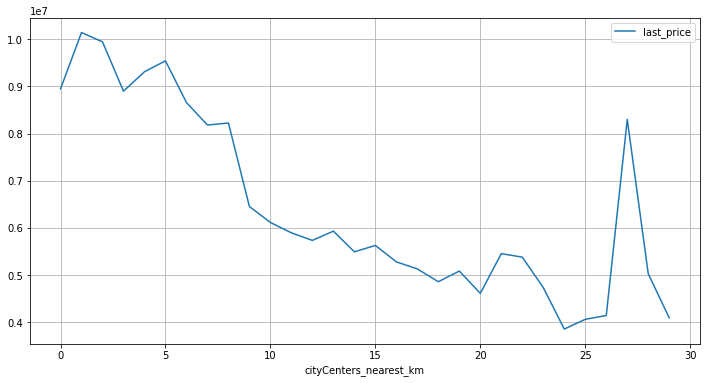

In [120]:
# построение графика динамики средней цены на каждом километре удаления от центра Санкт-Петербурга
(
    spb_apartments.pivot_table(index='cityCenters_nearest_km',
                               values='last_price',
                               aggfunc='mean')
    .plot(grid=True, figsize=(12, 6))
)


На графике видно, что в целом цены на недвижимость снижаются по мере увеличения расстояния от центра города. Это ожидаемая тенденция, так как недвижимость вблизи центра города, как правило, более дорогая из-за удобства расположения, доступности инфраструктуры и прочих факторов.

На графике можно заметить колебания цен на удалении от центра города. Такие колебания могут объясняться локальными факторами, такими как доступность транспорта, наличие парков, инфраструктура и т.д.

После 8-10 км наблюдается резкое снижение цен с некоторыми незначительными колебаниями. Это может свидетельствовать о снижении спроса на недвижимость в удалённых районах или о менее дорогостоящей недвижимости в этих районах в целом.

В районе 25-30 км можно увидеть резкое снижение цены с последующим подъёмом, что может указывать на аномальные данные, возможно, связанные с единичными предложениями, которые выбиваются из общей тенденции, или особенностями конкретного района.

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Верно. На графике после 7 км заметно, что цена меняется. Это возможный центр города.

Если интересно, то самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.
Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2

</div>

## Общий вывод

<div class="alert alert-info">В предоставленных для анализа исходных данных были обнаружены пропуски и аномальные значения.

1. Во многих столбцах с числовыми данными были обнаружены пропуски. Там, где это было возможно пропуски были заменены на медианные значения или значения, которые можно было предположить логически. 
- Пропущенные значения в столбце 'balcony' с большой долей вероятности указывают на отсутсвие балконов в данном объекте недвижимости. Такие пропуски были заменены на 0. 
- Пропуски в столбцах 'living_area' и 'kitchen_area' нельзя заменить логисекси предположив значение, средней или медианой, т.к. объекты значительно отличаются по размерам общей площади. В данном случае пропуски были заполнены исходя из рассчета медианного соотношения жилой и кухонной площади к общей площади квартиры и для строк с пропусками рассчитаны доли жилой и кухонной плащади от общей. 
- Пропуски в столбце 'ceiling_height' были заполнены медианным значением.
- Пропуски в столбцах 'parks_nearest' и 'ponds_nearest' были заменены на 0, при условии что в столбцах 'parks_around3000' и 'ponds_around3000' указано значение 0.
- Пропуски в столбце 'days_exposition' были оставлены как есть. Наибольшее количество пропуско в строках за 2019-2018 года (наиболее поздние года в выборке, а это указывает на то, что данные объявления могуть быть все еще актуальны.
- Строки с пропусками в столбцах 'floors_total', 'locality_name', были удалены из выборки, так как предположить логичную замену в этих данных невозможно.

Также в данных были измеены типы некоторых столбцов:
- В столбце 'is_apartment' тип данных был изменен с object на bool. При замене типа данных пропущенные значения автоматически заменились значением False.
- В столбцах 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition'  указан тип данных float (вещественное число),но значения в этих столбцах могут быть только целочисленные. Тип данных был изменен с float на int (целое число).
- В столбцах 'total_area', 'living_area', 'kitchen_area' изменены типы данных с float64 на float32 для оптимизации объемов занимаемой памяти.


Пропуски в данных могут появляться по различным причинам:
- Технические ошибки при сборе данных
- Человеческий фактор (пропуски при заполнении анкет или ввод некорректных данных)
- Несуществующие значения (например квартира продается в поселке или деревне и расстояние до центра города и\или аэропорта нет, т.к. их нет поблизости от дома\квартиры или населенного пункта)
- Ошибки при выгрузке или передаче данных.

Для более точной аналитики и построения более точных прогнозов рекомендуется исправить ошибки в сборе данных.

2. В столбце с названиями населенных пунктов одни и те же типы населенных пунктов написаны по разному (например "городской поселок" и " поселок городского типа"), а также используются буквы е и ё. Все названия были приведены к единому виду.

3. В столбцах 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total' были обнаружены строки с аномальными значениями. Эти строки могут значительно повлиять на анализ, из-за чего можно неверно оценить данные и сделать ошибочные выводы. Значения каждого столбца были рассмотрены в отдельности, в случаях когда можно было предположить природу искажения, данные были приведены к нормальным значениям. В иных случаях строки с выбивающимися значениями были удалены из выборки.

---

Для удобства расчетов и дальнейшего анализа в данные были добавлены столбцы:
- с ценой одного 1 кв.м.;
- днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяцем публикации объявления;
- годом публикации объявления;
- типом этажа квартиры (значения — «первый», «последний», «другой»);
- расстоянием до центра города в километрах.
- долей жилой и кухонной площадей от общей площади квартиры.

---
Анализ продолжительности продажи объекта недвижимости.
    
Судя по данным около 25% объектов недвижимости продаются за 50 или меньше дней, около 25% объектов продаются около 220 или более дней, оставшиеся 50% (большинство объектов недвижимости)продаются в диапазоне от 50 до 220 дней. 
    
Также в данных есть большое количество выбросов, начинающихся примерно с 500 дней. Это указывает на наличие объектов, которые значительно дольше находились в продаже. Это может быть связано с различными факторами, такими как завышенная цена, низкий спрос, или специфические характеристики объекта.
    
---

Из факторов, наиболее влияющих на стоимость объекта недвижимости, можно выделить следующие:
- общая площадь;
- жилая площадь;
- кухонная площадь;
- этаж, на котором расположен объект;
- территориальное расположение объекта;
- удаленность от центра города;
- даты публикации объявления.

Изучив влияние каждого из этих факторов на стоимость объекта недвижимости, можно сделать следующие выводы:

1. **Общая площадь**
Общая площадь недвижимости оказывает значительное влияние на ее стоимость. Существует положительная корреляция между общей площадью и ценой: с увеличением площади цена также увеличивается. Однако эта зависимость не является строго линейной, так как на стоимость влияют и другие факторы, такие как местоположение, состояние недвижимости, год постройки, наличие ремонта и дополнительные удобства. Наибольшей популярностью на рынке пользуются объекты площадью от 20 до 100 квадратных метров в ценовом диапазоне до 10 миллионов рублей.

2. **Жилая и кухонная площадь**
Жилая и кухонная площадь также имеют положительную корреляцию с ценой объекта. Более просторные и удобные пространства в квартире, такие как большая жилая и кухонная площади, обычно приводят к увеличению стоимости. Однако эти параметры также показывают широкий разброс цен, что указывает на значительное влияние дополнительных факторов, таких как местоположение и индивидуальные особенности объекта.

3. **Количество комнат**
Увеличение количества комнат также связано с ростом средней цены недвижимости. С увеличением числа комнат медианная цена возрастает, а диапазон цен для становиться более широким, что может свидетельствовать о разнообразии в качестве и характеристиках таких объектов. 

4. **Категория этажа**
Этажность объекта также влияет на его стоимость. Объекты, расположенные на этажах, отличных от первого и последнего, имеют более высокие медианные цены. Это связано с предпочтением покупателей избегать крайних этажей, а также с наличием дорогих объектов с уникальными характеристиками на всех этажах.

5. **День недели публикации объявления**
Анализ времени публикации объявления показывает, что день недели не оказывает значительного влияния на цену объекта. Медианы цен остаются стабильными независимо от дня недели, хотя разброс цен присутствует в любой день.

6. **Месяц публикации объявления**
Анализ публикации объявления по месяцам не показал значительных изменений в ценах от месяца к месяцу. Графики показывают стабильность цен в течение года, указывая на то, что месячное влияние на цены отсутствует. 

7. **Год публикации объявления**
Анализ по годам показывает, что на рынке произошли значительные изменения в 2014-2015 годах. Общая площадь объектов продающейся недвижимости значительно снизились в 2014 году, что и привело к снижению средних цен. После 2015 года цены стабилизировались. 

8. **Географическое расположение объекта**
Географическое расположение объекта недвижимости имеет большое влияние на среднюю стоимость. Самые высокие цены за кв. м. наблюдаются в Санкт-Петербурге и ближайшем к нему пригороде, где высокий спрос на недвижимость. 

9. **Динамика цены в зависимости от удаления от центра Санкт-Петербурга**
В Санкт-Петербурге цены снижаются с увеличением удаленности от центра города, что соответствует классической модели ценообразования на рынке недвижимости.

---

**Вывод:**

Исходя из вышесказанного, можно сделать заключение, что цена на объекты недвижимости определяется комплексом факторов, где главную роль играют общая и жилая площади, количество комнат, этажность и географическое расположение. Время публикации объявления не оказывает значительного влияния на стоимость. Рынок недвижимости демонстрирует стабильность в ценах в течение года. Важнейшим фактором, влияющим на ценообразование, является расположение недвижимости, с наибольшими ценами в центральных и престижных районах.

---

Стоит обратить внимание на то, что в исходных анализируемых данных большинство объектов недвижимости расположены в Санкт-Петербурге. Это может быть реальной обстановкой на рынке недвижимости в анализируемом регионе, а также внести неточность в расчеты из-за несбалансированости выборки присланной на анализ.

---

Для более точной аналитики и построения более точных прогнозов рекомендуется исправить ошибки в сборе данных. Необходимо определить и устранить причины отсутствия данных о площадях объекта (общей, жилой и кухонной), высоте потолков, наличия поблизости парков, прудов, аэропортов и т.д. Причинами пропусков и аномалий в данных могут быть технические ошибки при сборе или выгрузке данных, человеческий фактор при заполнении данных вручную (например при заполнении данных об объекте во время публикации объявления).</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Вероника, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Вероника, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>